#### The Apple Store is a rich source of data that can be used to gain insights into factors that contribute to app engagement and success. By exploring and analyzing data on categories, ratings, sizes, and customer reviews, developers can identify actionable insights to capture the iOS market. This project aims to uncover key factors that are responsible for app success and engagement in the Apple Store, and use these insights to drive business success. By leveraging the power of data science, this project has the potential to unlock a wealth of opportunities for app developers and businesses alike.

<div style="text-align:center;">
    <img src="https://cdn.dribbble.com/users/1663734/screenshots/6746987/ezgif.com-video-to-gif__1_.gif" alt="Alt Text" width="500" height="400">
</div>

### 📱 Hi everybody!

Mobile apps have become a ubiquitous part of our lives and have transformed the way we interact with technology. In this project, we will conduct a comprehensive analysis of the iOS app market by comparing thousands of apps in the Apple Store across different categories. By exploring the data, we will aim to uncover insights and devise strategies that can drive growth and retention for app developers.

The data for this project consists of two files:

* appleStore_description.csv: This file contains information about various applications available in the Apple Store.

* AppleStore.csv: This file contains the application descriptions for each app in the appleStore.csv file.

Before delving into the provided data, let me first introduce you to EDA (Exploratory Data Analysis) - a crucial step in any data analysis project. By conducting EDA, we can gain insights into the data and identify patterns or trends that may help us answer our research questions.

## Problem Statements


1. What are the top app categories on the Apple Store?
2. What is the distribution of free and paid apps on the Apple Store?
3. How important is the average user rating for an app's success on the Apple Store?
4. Which app categories have the highest average user ratings on the Apple Store?
5. Is there a correlation between the size of an app and its average user rating on the Apple Store?
6. How do the number of app installations vary by app category on the Apple Store?
7. Does the last update date of an app have an effect on its user rating on the Apple Store?
8. How does the sentiment subjectivity of user reviews relate to the average user rating for an app on the Apple Store?

In [43]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.colors as colors

# 1. Data Collection

In [44]:
df = pd.read_csv('datasets/AppleStore.csv').drop('Unnamed: 0',axis=1)
df.set_index('id', inplace=True)
df.head()

track_name  size_bytes  \
id                                                                         
281656475                                    PAC-MAN Premium   100788224   
281796108                          Evernote - stay organized   158578688   
281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
282935706                                              Bible    92774400   

          currency  price  rating_count_tot  rating_count_ver  user_rating  \
id                                                                           
281656475      USD   3.99             21292                26          4.0   
281796108      USD   0.00            161065                26          4.0   
281940292      USD   0.00            188583              2822          3.5   
282614216      USD   0.00            262241               649          4.0   
282935706      USD   0.00            985920              5320          4.5   

           user_rating_ver     ver cont_rating   prime_genre  sup_devices.num  \
id                                                                              
281656475              4.5   6.3.5          4+         Games               38   
281796108              3.5   8.2.2          4+  Productivity               37   
281940292              4.5   5.0.0          4+       Weather               37   
282614216              4.5  5.10.0         12+      Shopping               37   
282935706              5.0   7.5.1          4+     Reference               37   

           ipadSc_urls.num  lang.num  vpp_lic  
id                                             
281656475                5        10        1  
281796108                5        23        1  
281940292                5         3        1  
282614216                5         9        1  
282935706                5        45        1

In [45]:
apps_description = pd.read_csv('datasets/appleStore_description.csv')
apps_description

id                                         track_name  \
0      281656475                                    PAC-MAN Premium   
1      281796108                          Evernote - stay organized   
2      281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3      282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4      282935706                                              Bible   
...          ...                                                ...   
7192  1187617475                                              Kubik   
7193  1187682390                                  VR Roller-Coaster   
7194  1187779532              Bret Michaels Emojis + Lyric Keyboard   
7195  1187838770          VR Roller Coaster World - Virtual Reality   
7196  1188375727                       Escape the Sweet Shop Series   

      size_bytes                                           app_desc  
0      100788224  SAVE 20%, now only $3.99 for a limited time!\n...  
1      158578688  Let Evernote change the way you organize your ...  
2      100524032  Download the most popular free weather app pow...  
3      128512000  The eBay app is the best way to find anything ...  
4       92774400  On more than 250 million devices around the wo...  
...          ...                                                ...  
7192   126644224  Place the falling blocks correctly in order to...  
7193   120760320  A thrilling virtual reality roller coaster exp...  
7194   111322112  Rock star Bret Michaels, winner of Celebrity A...  
7195    97235968  VR Roller Coaster World is an app for Google C...  
7196    90898432  5 previous escape games plus 1 new game in one...  

[7197 rows x 4 columns]

In [46]:
# Check the shape of the dataset
print(df.shape)

(7197, 15)


In [47]:
# Check the data types of the columns
print(df.dtypes)

track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object


### Let us first define what information the columns contain based on our inspection.

appleStore.csv: This file contains information about various applications available in the Apple Store. It includes the following columns:

* id: App ID
* track_name: App Name
* size_bytes: Size (in Bytes)
* currency: Currency Type
* price: Price amount
* rating_count_tot: User Rating counts (for all version)
* rating_count_ver: User Rating counts (for current version)
* user_rating: Average User Rating value (for all version)
* user_rating_ver: Average User Rating value (for current version)
* ver: Latest version code
* cont_rating: Content Rating
* prime_genre: Primary Genre
* sup_devices.num: Number of supporting devices
* ipadSc_urls.num: Number of screenshots showed for display
* lang.num: Number of supported languages
* vpp_lic: Vpp Device Based Licensing Enabled


appleStore_description.csv: This file contains the application descriptions for each app in the appleStore.csv file. It includes the following columns:

* id: App ID
* track_name: Application name
* size_bytes: Memory size (in Bytes)
* app_desc: Application description

## 2. Exploratory Data Analysis

### Data Cleaning

In [48]:
df.isnull().sum()

track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [49]:
# Check for duplicates
print(df.duplicated().sum())

0


No values were found for cleaning in this first inspection.

### Exploratory Data Analysis EDA

In [50]:
df.describe()

size_bytes        price  rating_count_tot  rating_count_ver  \
count  7.197000e+03  7197.000000      7.197000e+03       7197.000000   
mean   1.991345e+08     1.726218      1.289291e+04        460.373906   
std    3.592069e+08     5.833006      7.573941e+04       3920.455183   
min    5.898240e+05     0.000000      0.000000e+00          0.000000   
25%    4.692275e+07     0.000000      2.800000e+01          1.000000   
50%    9.715302e+07     0.000000      3.000000e+02         23.000000   
75%    1.819249e+08     1.990000      2.793000e+03        140.000000   
max    4.025970e+09   299.990000      2.974676e+06     177050.000000   

       user_rating  user_rating_ver  sup_devices.num  ipadSc_urls.num  \
count  7197.000000      7197.000000      7197.000000      7197.000000   
mean      3.526956         3.253578        37.361817         3.707100   
std       1.517948         1.809363         3.737715         1.986005   
min       0.000000         0.000000         9.000000         0.000000   
25%       3.500000         2.500000        37.000000         3.000000   
50%       4.000000         4.000000        37.000000         5.000000   
75%       4.500000         4.500000        38.000000         5.000000   
max       5.000000         5.000000        47.000000         5.000000   

          lang.num      vpp_lic  
count  7197.000000  7197.000000  
mean      5.434903     0.993053  
std       7.919593     0.083066  
min       0.000000     0.000000  
25%       1.000000     1.000000  
50%       1.000000     1.000000  
75%       8.000000     1.000000  
max      75.000000     1.000000

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 281656475 to 1188375727
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   object 
 1   size_bytes        7197 non-null   int64  
 2   currency          7197 non-null   object 
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   rating_count_ver  7197 non-null   int64  
 6   user_rating       7197 non-null   float64
 7   user_rating_ver   7197 non-null   float64
 8   ver               7197 non-null   object 
 9   cont_rating       7197 non-null   object 
 10  prime_genre       7197 non-null   object 
 11  sup_devices.num   7197 non-null   int64  
 12  ipadSc_urls.num   7197 non-null   int64  
 13  lang.num          7197 non-null   int64  
 14  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 899.6+ KB


To perform a better analysis we consider two classes: Free apps and Premium apps.

In [52]:
# create the free_apps dataframe where price is 0
free_apps = df[df["price"] == 0]

# create the premium_apps dataframe where price is greater than 0.1
premium_apps = df[df["price"] > 0.1]

What are the apps with the most users by genre?

In [53]:
# create a bar chart of the number of apps by genre for free_apps
free_apps_by_genre = free_apps.groupby("prime_genre").size().reset_index(name="count")
free_apps_by_genre = free_apps_by_genre.sort_values(by="count", ascending=False)

fig1 = px.bar(free_apps_by_genre, x="prime_genre", y="count", title="Number of Free Apps by Genre", color_discrete_sequence=px.colors.qualitative.Pastel)

# create a pie chart of the distribution of app ratings for free_apps
fig2 = px.pie(free_apps, values="user_rating", names="prime_genre", title="Distribution of App Ratings by Genre", color_discrete_sequence=px.colors.qualitative.Pastel)

# show the charts
fig1.show()
fig2.show()


In [54]:
# create a bar chart of the number of apps by genre for premium_apps
premium_apps_by_genre = premium_apps.groupby("prime_genre").size().reset_index(name="count")
premium_apps_by_genre = premium_apps_by_genre.sort_values(by="count", ascending=False)
fig1 = px.bar(premium_apps_by_genre, x="prime_genre", y="count", title="Number of Premium Apps by Genre", color_discrete_sequence=px.colors.qualitative.Safe)

# create a pie chart of the distribution of app prices for premium_apps
fig2 = px.pie(premium_apps, values="price", names="prime_genre", title="Distribution of Premium Apps Prices by Genre", color_discrete_sequence=px.colors.qualitative.Pastel)

# show the charts
fig1.show()
fig2.show()


**Findings:**

For both classes, **gaming** apps have the highest share of usage in the App Store.

###  2). What is the ratio of number of Paid apps and Free apps?


In [55]:
# Count the number of free and premium apps
free_apps_count = (df['price'] == 0).sum()
premium_apps_count = (df['price'] > 0).sum()

# Define custom colors
colors = ["#00203FFF","#ADEFD1FF"]

# Create a pie chart
labels = ['Free Apps', 'Premium Apps']
values = [free_apps_count, premium_apps_count]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.update_layout(title='Distribution of Free vs Premium Apps')

# Show the chart
fig.show()

**Findings:**

From the above graph we can see that 43.6% of apps in the App Store are Premium and 56.4% are Free, which is an almost equal proportion.

###  3). Insights on applications and their size (bytes) 

In [56]:
# Get the 5 apps with highest size_bytes
new_df = df.loc[:, ['track_name', 'size_bytes', 'rating_count_tot', 'rating_count_ver', 'user_rating']]
top_8_apps = new_df.sort_values('size_bytes', ascending=False).head(8)
top_8_apps

track_name  size_bytes  rating_count_tot  \
id                                                                        
1106831630                ROME: Total War  4025969664               373   
1146713881                パチスロ ガールズ＆パンツァー  3975609344                 0   
1141253112              戦国乙女2～深淵に輝く気高き将星～  3968637952                 0   
1055962232               デビルサバイバー２ 最後の７日間  3956326400                 0   
1108475553  Jade Empire™: Special Edition  3896109056               206   
1041260001                FINAL FANTASY Ⅸ  3860406272              1502   
1091640857            That Dragon, Cancer  3856588800               132   
687888390                      République  3646993408              7078   

            rating_count_ver  user_rating  
id                                         
1106831630                 4          4.5  
1146713881                 0          0.0  
1141253112                 0          0.0  
1055962232                 0          0.0  
1108475553                64          4.5  
1041260001                63          4.5  
1091640857                50          4.5  
687888390                102          4.5

In [57]:
# Create a bar chart with the plasma color palette
fig = px.bar(top_8_apps, y='track_name', x='size_bytes', color='size_bytes', color_continuous_scale='ylgnbu',orientation='h')
fig.update_layout(title='Top 8 Apps with the Highest Size in bytes',
                  xaxis_title='App Name',
                  yaxis_title='Size (Bytes)')

# Show the chart
fig.show()

**Findings:**

* As expected, games are the heaviest apps on the App Store.
* All these heavier games are paid apps. 
* Although there are games that look promising, they have low user numbers (specially Chinese titles). 
* Only "République" is a game with some kind of popularity.

###  3). Who are the leaders of the market by genre?

In [58]:
# Extracting the relevant data
df_2 = df.copy()
df_2['track_name'] = df_2['track_name'].str.split().str[:3].str.join(' ')

top_apps_by_genre = df_2.groupby('prime_genre').apply(lambda x: x.loc[x['rating_count_tot'] == x['rating_count_tot'].max()].iloc[0])
top_apps_by_genre = top_apps_by_genre.sort_values('rating_count_tot', ascending=False)

# Top performers
new_df = top_apps_by_genre[['track_name', 'rating_count_tot']].reset_index()
new_df


prime_genre              track_name  rating_count_tot
0   Social Networking                Facebook           2974676
1       Photo & Video               Instagram           2161558
2               Games          Clash of Clans           2130805
3               Music         Pandora - Music           1126879
4           Reference                   Bible            985920
5    Health & Fitness       Calorie Counter &            507706
6             Weather    The Weather Channel:            495626
7           Utilities         Google – Search            479440
8              Travel            Google Earth            446185
9            Shopping        Groupon - Deals,            417779
10               News                 Twitter            354058
11         Navigation              Waze - GPS            345046
12          Lifestyle      Zillow Real Estate            342969
13      Entertainment                 Netflix            308844
14       Food & Drink               Starbucks            303856
15             Sports       ESPN: Get scores,            290996
16               Book           Kindle – Read            252076
17            Finance           Chase Mobile℠            233270
18          Education        Duolingo - Learn            162701
19       Productivity         Evernote - stay            161065
20           Business       Indeed Job Search             38681
21           Catalogs    CPlus for Craigslist             13345
22            Medical  Baby Connect (Activity              3483

In [59]:
# Creating the figure
fig = px.bar(new_df, x='rating_count_tot', y='prime_genre', color='prime_genre',
             hover_data={'rating_count_tot': ':.0f', 'track_name': True},
             text='track_name', orientation='h',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Customize layout
fig.update_layout(title='Leaders of the Market by Genre',
                  xaxis_title='Rating Count',
                  yaxis_title='Genre',
                  template='plotly_white',
                  showlegend=False,
                  height=900,
                  hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'))

# Show figure
fig.show()

###  4). Who are top rated apps? Proportion of Total Rating Count and User Rating

In [60]:
top_rated = df.copy()
# Calculate the proportion of rating_count_tot and user_rating
top_rated['proportion'] = top_rated['rating_count_tot'] / top_rated['user_rating']

# Sort the dataframe by the proportion in descending order
top_rated = top_rated.sort_values('proportion', ascending=False)

# Print the top 10 apps based on the proportion
top_rated = top_rated[['track_name', 'rating_count_tot', 'user_rating', 'proportion']].head(10)


In [65]:
# Choose a pastel color scale from the available options
import plotly.colors as colors
color_scale = colors.sequential.Darkmint

# Create the treemap figure with the chosen pastel color scale
fig = px.treemap(top_rated,
                 path=['track_name'],
                 values='rating_count_tot',
                 color='user_rating',
                 color_continuous_scale=color_scale,
                 hover_data=['proportion'])

# Update the figure layout with title and size
fig.update_layout(title='Top Rated Apps on the App Store (Proportion)',
                  width=600, height=400,
                  margin=dict(l=50, r=50, b=50, t=80, pad=4))

# Show the figure
fig.show()

## Data Exploration--Univariate & Bivariate Analysis

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features

Text(0.5, 1.0, 'Pairwise Plot - Size, Rating, User Rating, Language Support, Devices Support, Screenshots')

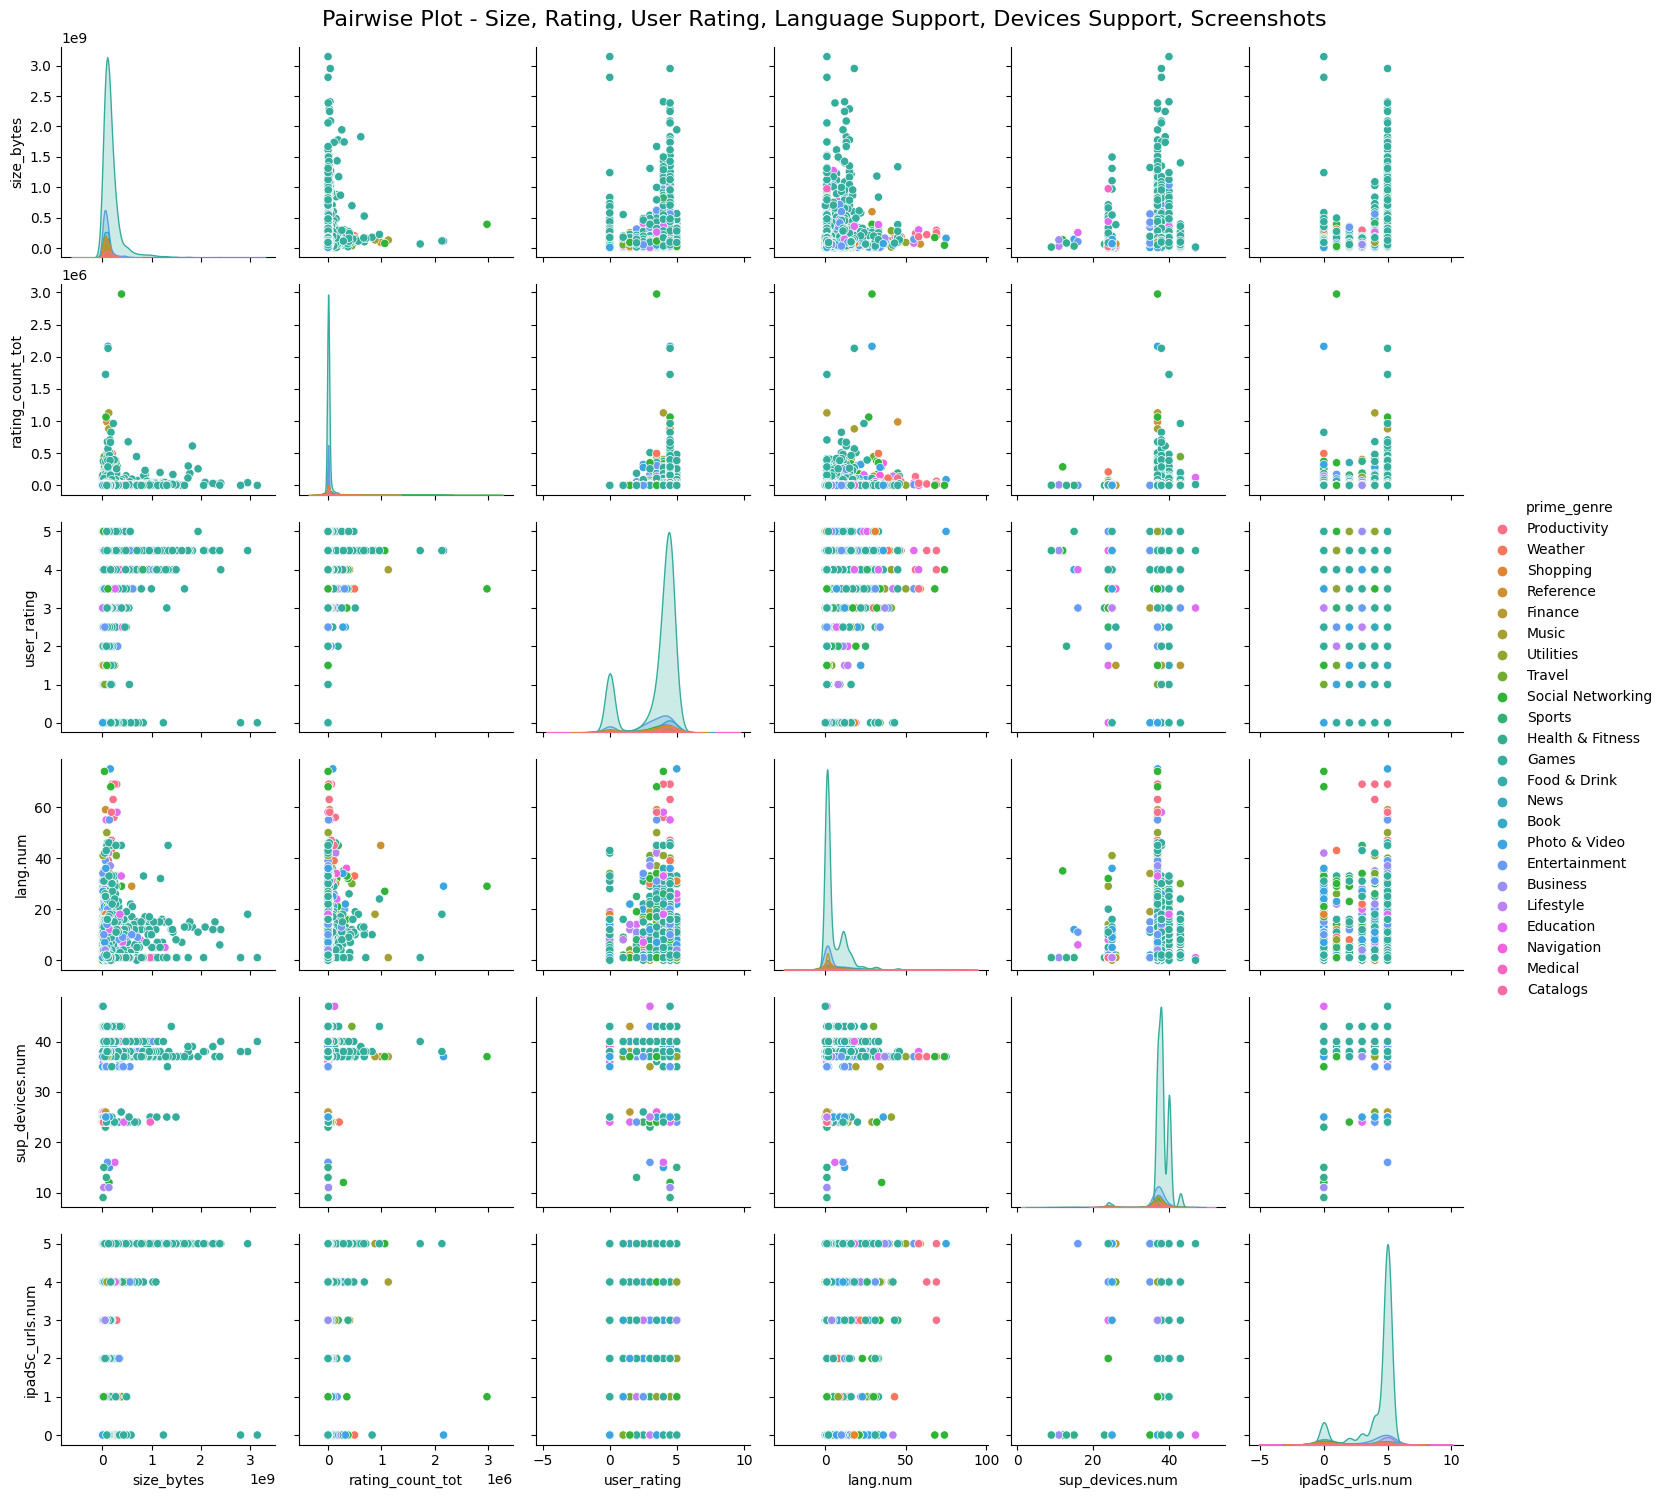

In [66]:
# create a pairplot of the free_apps dataframe
p = sns.pairplot(free_apps, vars=["size_bytes", "rating_count_tot", "user_rating", 'lang.num', 'sup_devices.num', 'ipadSc_urls.num'], hue="prime_genre")
p.fig.suptitle("Pairwise Plot - Size, Rating, User Rating, Language Support, Devices Support, Screenshots",x=0.5, y=1.0, fontsize=16)

### ☘ Findings Free Apps
* As **Language Support** (More languages available) increases, the **rating** of the app increases.
* When **more devices** are supported, the **overall rating** will increase.
* **User Rating** increases when the **size** increases. 

Text(0.5, 1.0, 'Pairwise Plot - Size, Rating, User Rating, Language Support, Devices Support, Screenshots')

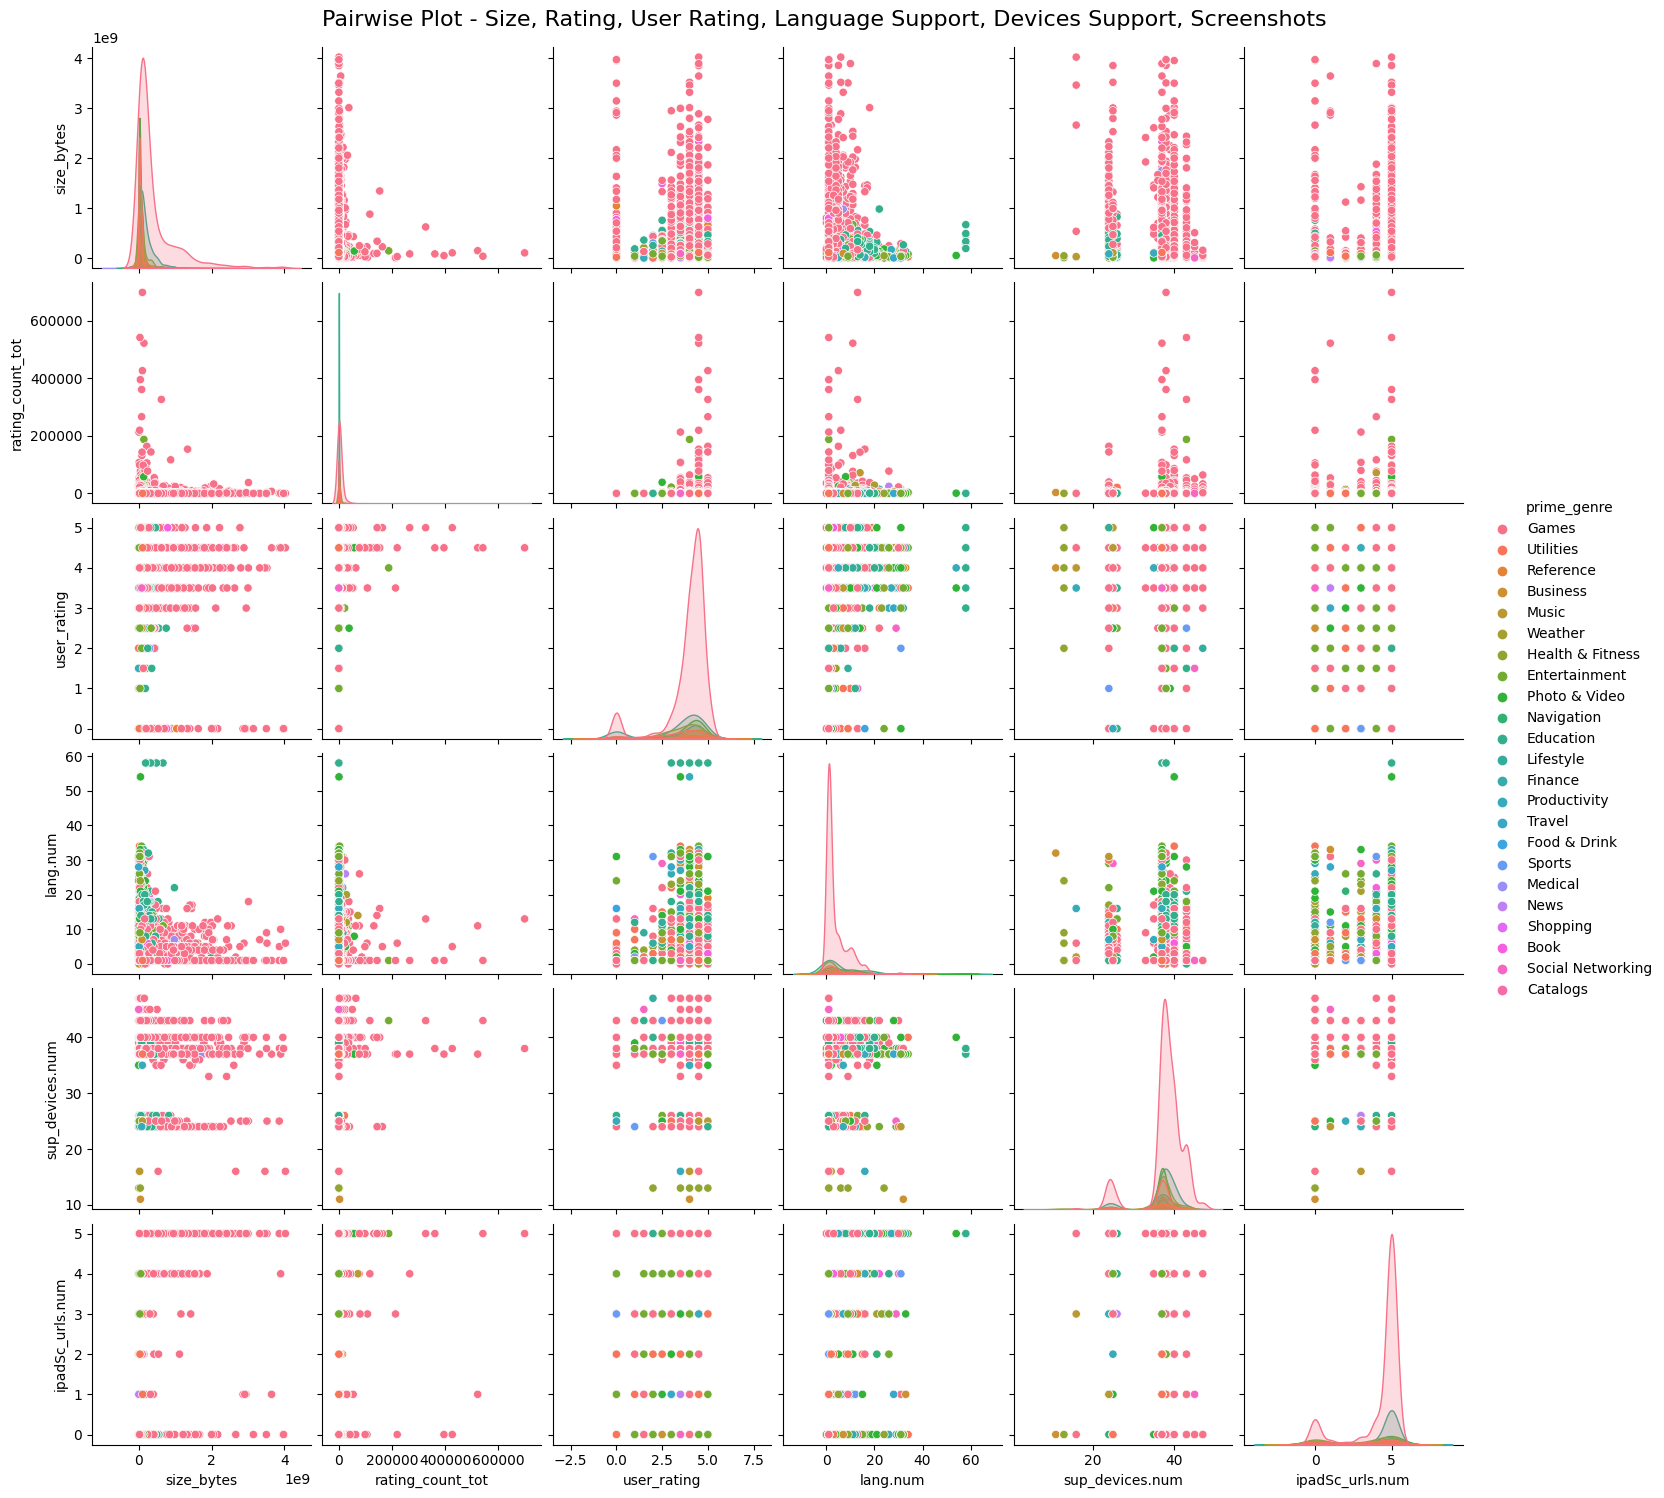

In [67]:
# create a pairplot of the premium_apps dataframe
s = sns.pairplot(premium_apps, vars=["size_bytes", "rating_count_tot", "user_rating", 'lang.num', 'sup_devices.num', 'ipadSc_urls.num'], hue="prime_genre")
s.fig.suptitle("Pairwise Plot - Size, Rating, User Rating, Language Support, Devices Support, Screenshots",x=0.5, y=1.0, fontsize=16)

### ☘ Findings Premium Apps
* As **Language Support** (More languages available) increases, the **rating** of the app increases.
* **User Rating** increases when the **size** increases. 
* **Rating** is really low in a premium app when the **size** of the app is low. 

## Bivariate Analysis

### Size vs Rating in Free Apps


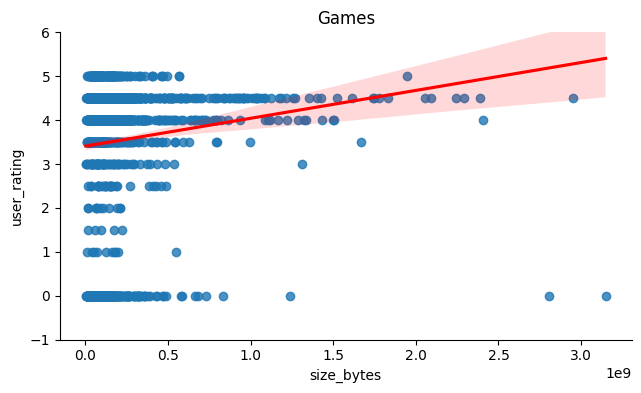

In [68]:
# filter free_apps to only include the 'Games' genre
games_apps = free_apps.loc[free_apps['prime_genre'] == 'Games']

# create a list of the unique genres in the games_apps dataframe
genres = games_apps['prime_genre'].unique()

# create a 2x2 grid of plots
g = sns.lmplot(x='size_bytes', y='user_rating', data=games_apps, col='prime_genre', col_wrap=4, hue='prime_genre', line_kws={'color': 'red'}, height=4, aspect=1.5)

# set the titles and y-axis limits for each plot
for i, ax in enumerate(g.axes.flat):
    ax.set_title(genres[i])
    ax.set(ylim=(-1, 6))

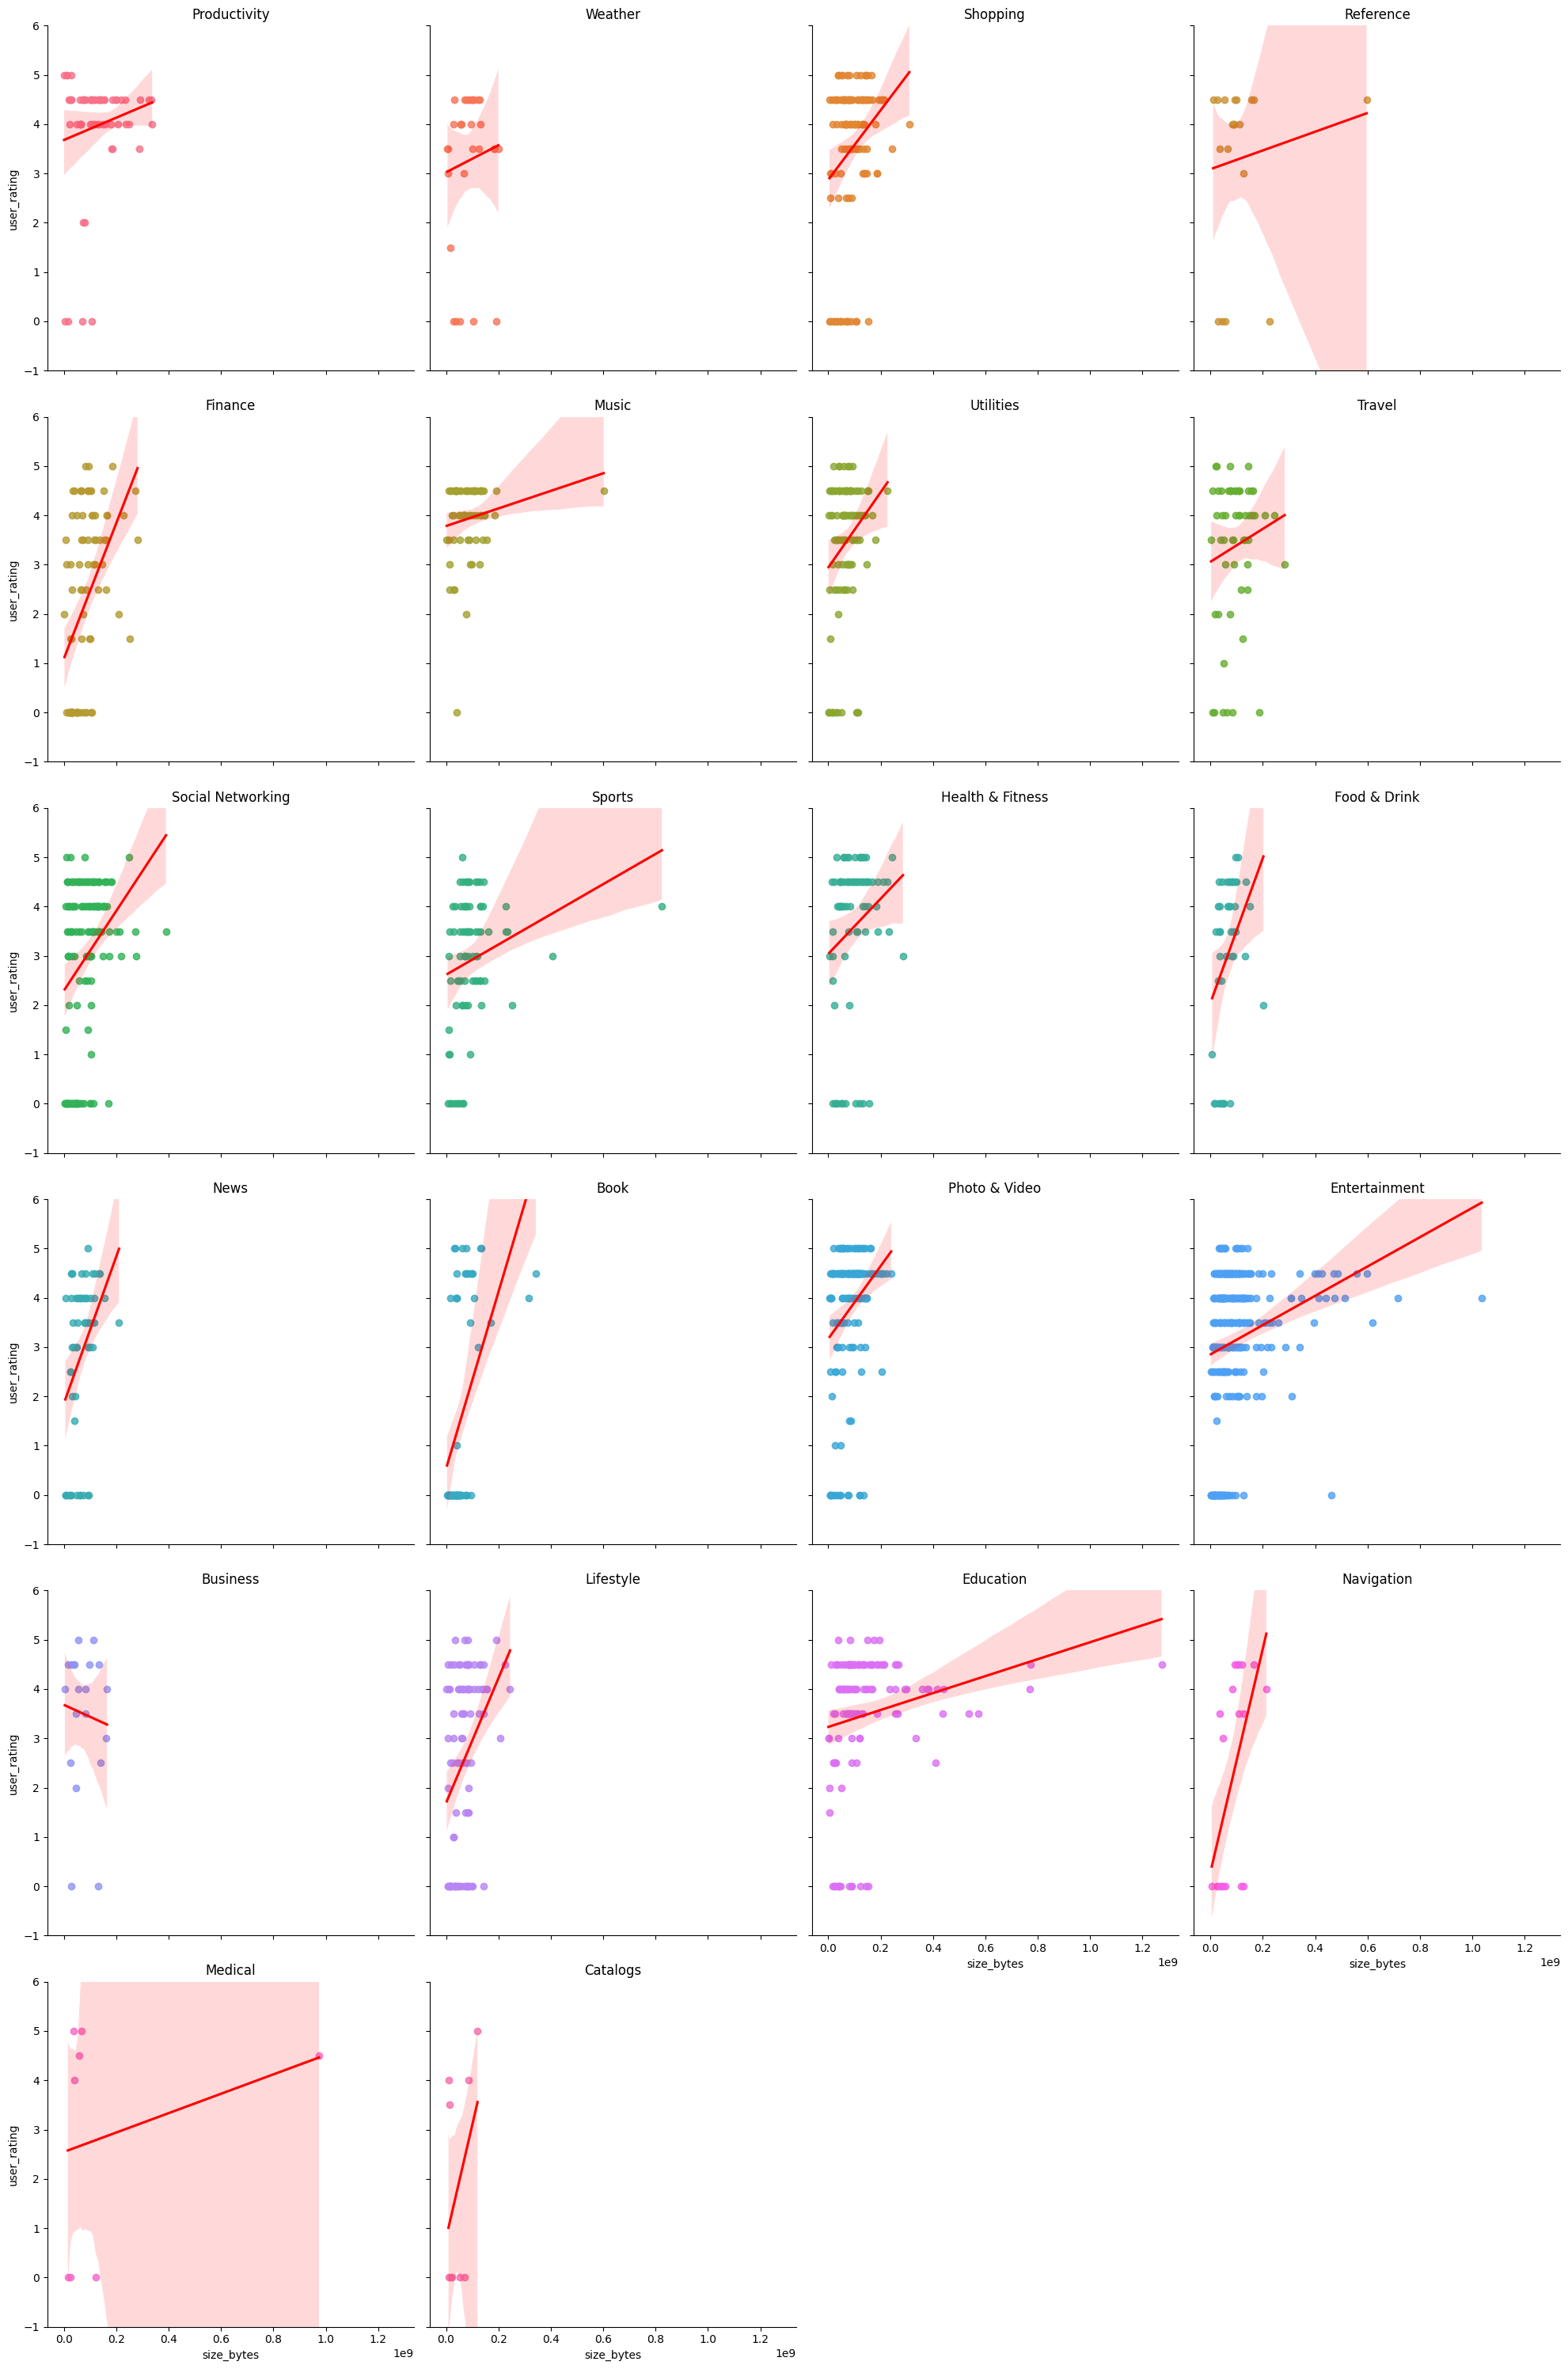

In [69]:
free_apps_no_games = free_apps.drop(free_apps[free_apps['prime_genre'] == 'Games'].index)

# create a list of the unique genres in the free_apps dataframe
genres = free_apps_no_games['prime_genre'].unique()

# create a 2x2 grid of plots
g = sns.lmplot(x='size_bytes', y='user_rating', data=free_apps_no_games, col='prime_genre', col_wrap=4, hue='prime_genre', line_kws={'color': 'red'})

# set the titles and y-axis limits for each plot
for i, ax in enumerate(g.axes.flat):
    ax.set_title(genres[i])
    ax.set(ylim=(-1, 6))

### Size vs Rating in Premium Apps

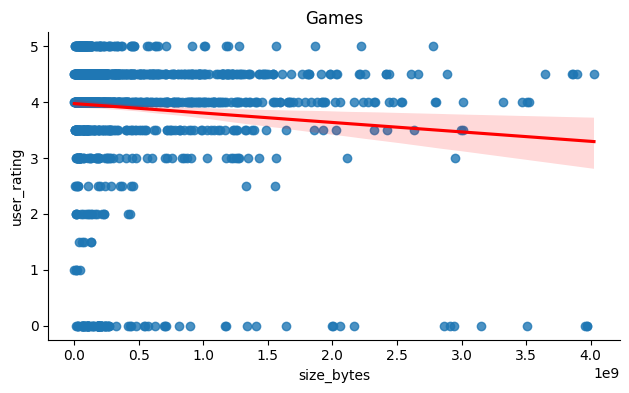

In [70]:
# filter free_apps to only include the 'Games' genre
games_apps_2 = premium_apps.loc[premium_apps['prime_genre'] == 'Games']

# create a list of the unique genres in the games_apps dataframe
genres = games_apps_2['prime_genre'].unique()

# create a 2x2 grid of plots
g = sns.lmplot(x='size_bytes', y='user_rating', data=games_apps_2, col='prime_genre', col_wrap=4, hue='prime_genre', line_kws={'color': 'red'}, height=4, aspect=1.5)

# set the titles and y-axis limits for each plot
for i, ax in enumerate(g.axes.flat):
    ax.set_title(genres[i])

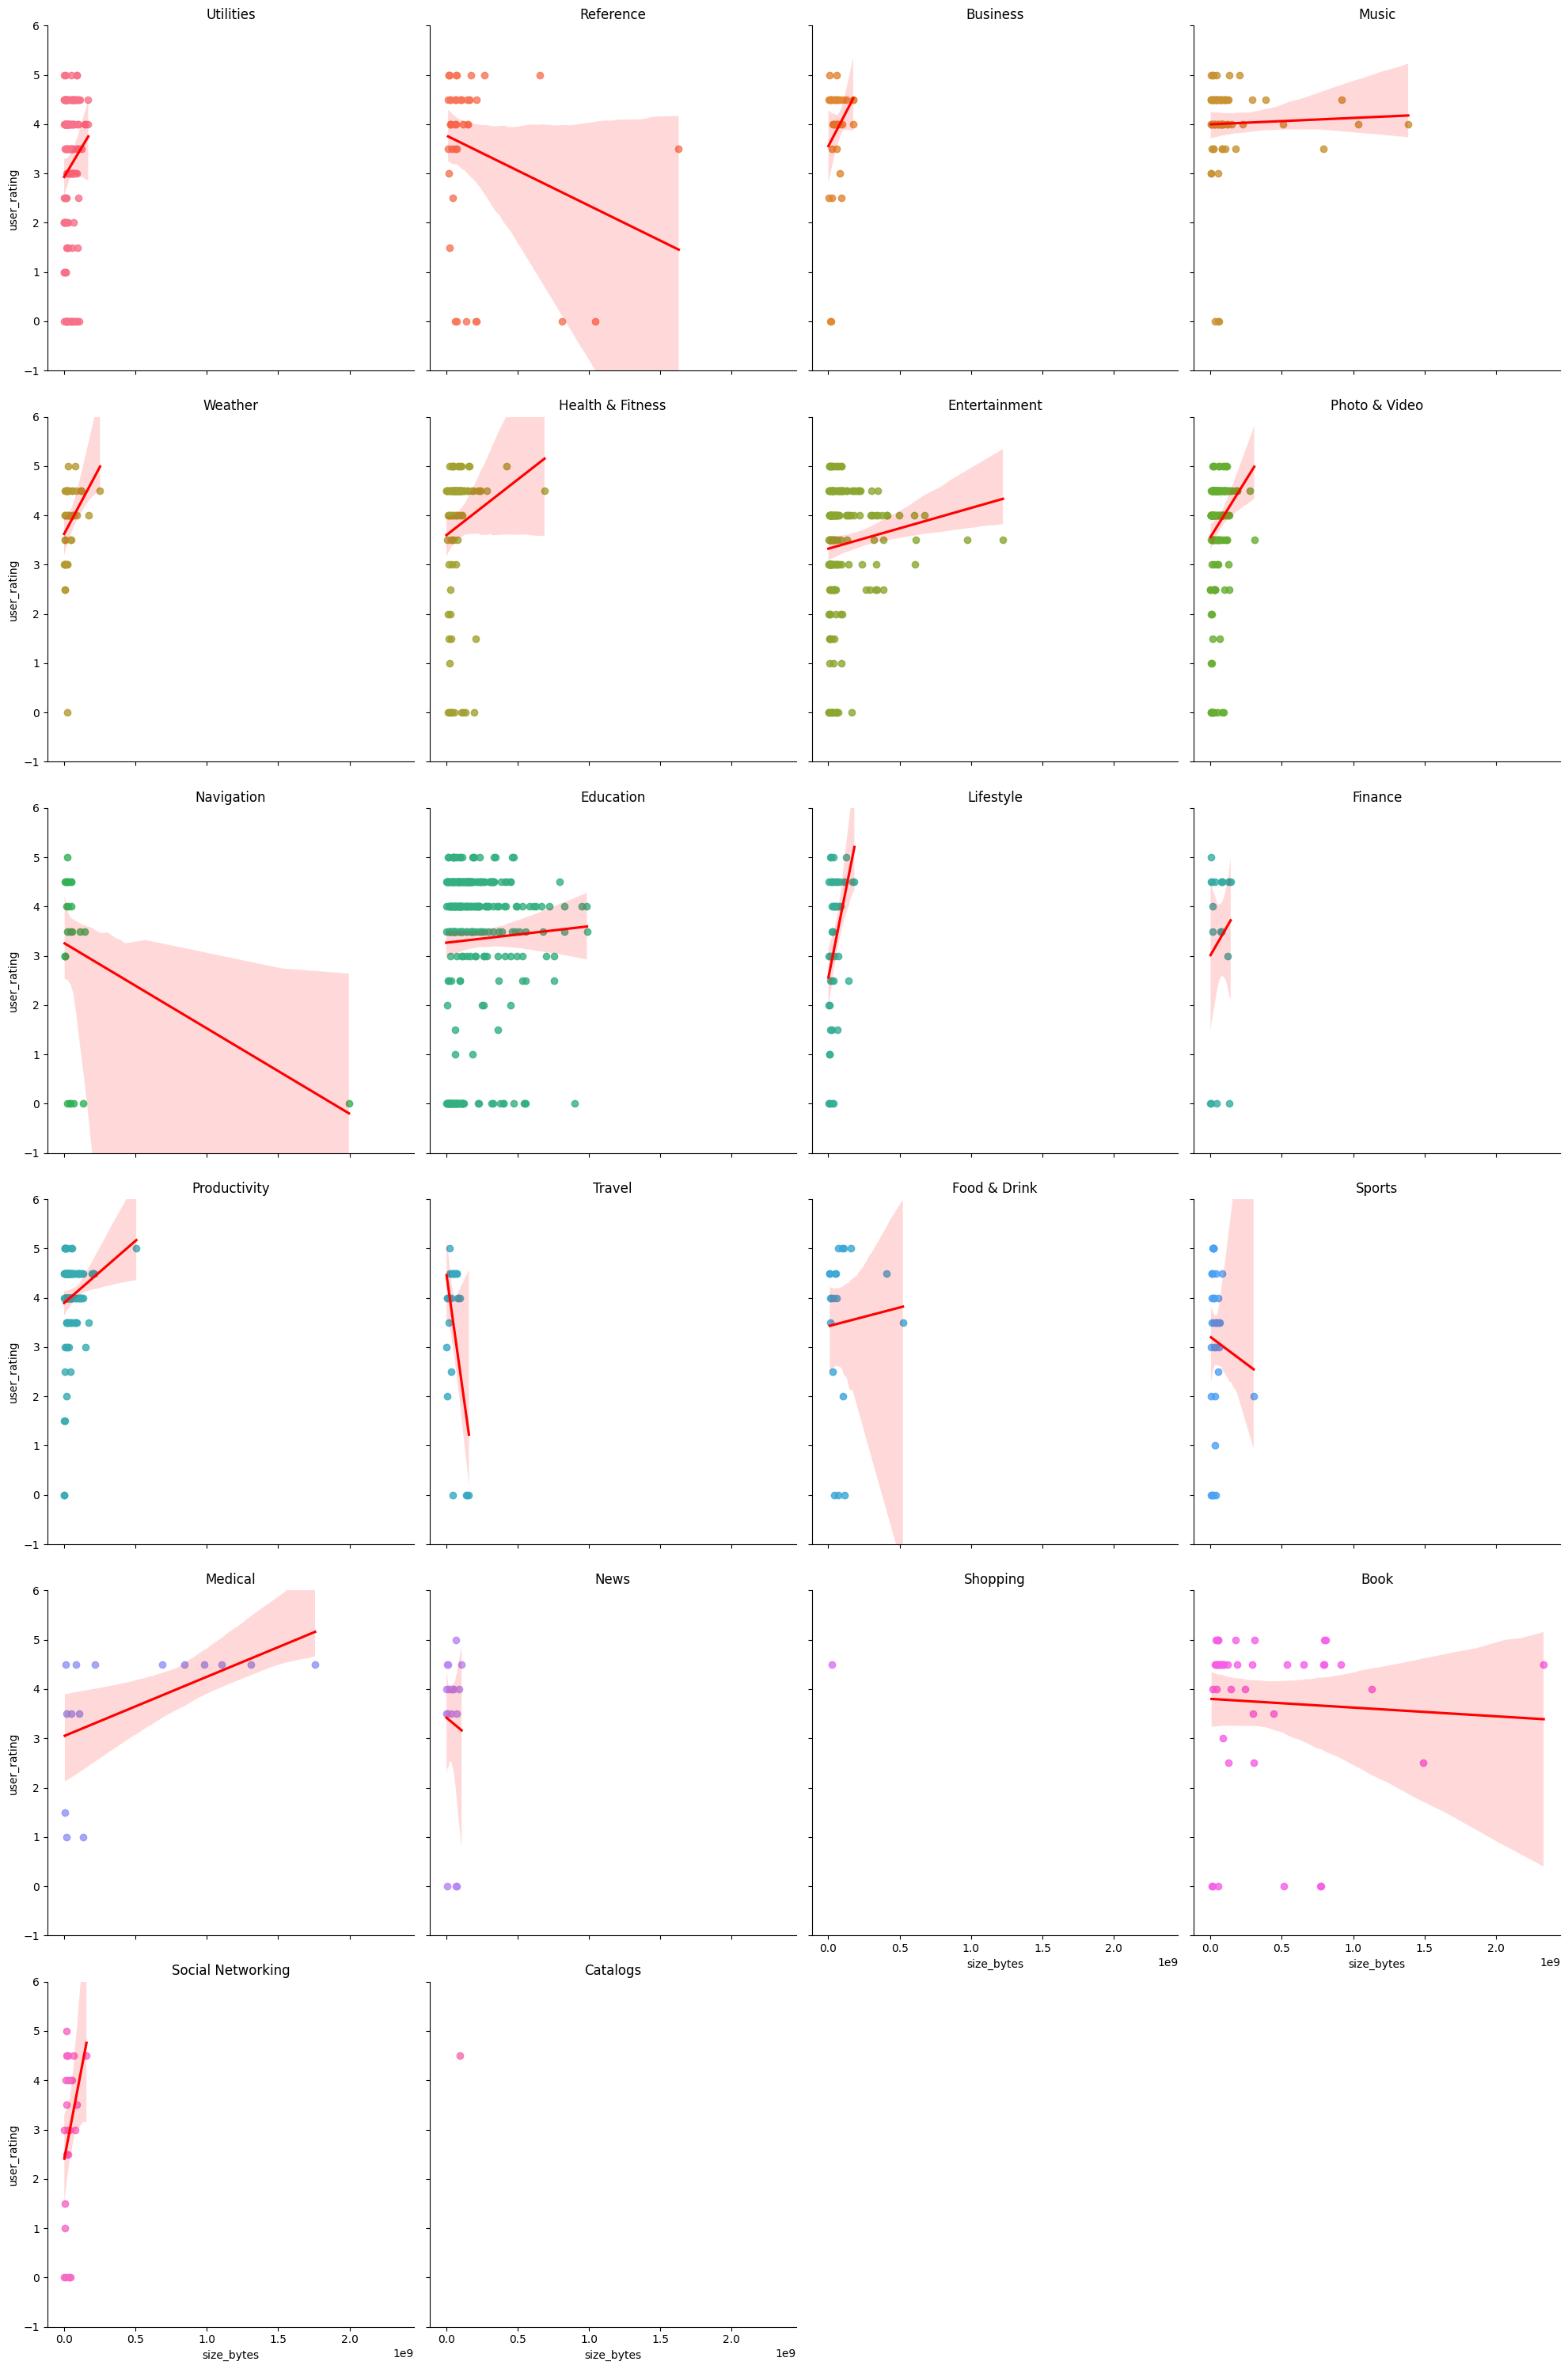

In [71]:
premium_apps = premium_apps.drop(premium_apps[premium_apps['prime_genre'] == 'Games'].index)

# create a list of the unique genres in the free_apps dataframe
genres = premium_apps['prime_genre'].unique()

# create a 2x2 grid of plots
g = sns.lmplot(x='size_bytes', y='user_rating', data=premium_apps, col='prime_genre', col_wrap=4, hue='prime_genre', line_kws={'color': 'red'})

# set the titles and y-axis limits for each plot
for i, ax in enumerate(g.axes.flat):
    ax.set_title(genres[i])
    ax.set(ylim=(-1, 6))

### ☘ Findings
* For **Free Applications**, the overall **rating increases** in all categories as their **size** grows. 
* For premium applications, behaviour is mixed, with the rating depending largely on whether the application meets users' standards and whether they feel they should pay for the service.
* In **premium games**, if the **weight** of the application is not high, the rating also tends to go down. 


## Analysis of correlations between variables

C:\Users\Edwar\AppData\Local\Temp\ipykernel_15144\3895162033.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Edwar\AppData\Local\Temp\ipykernel_15144\3895162033.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



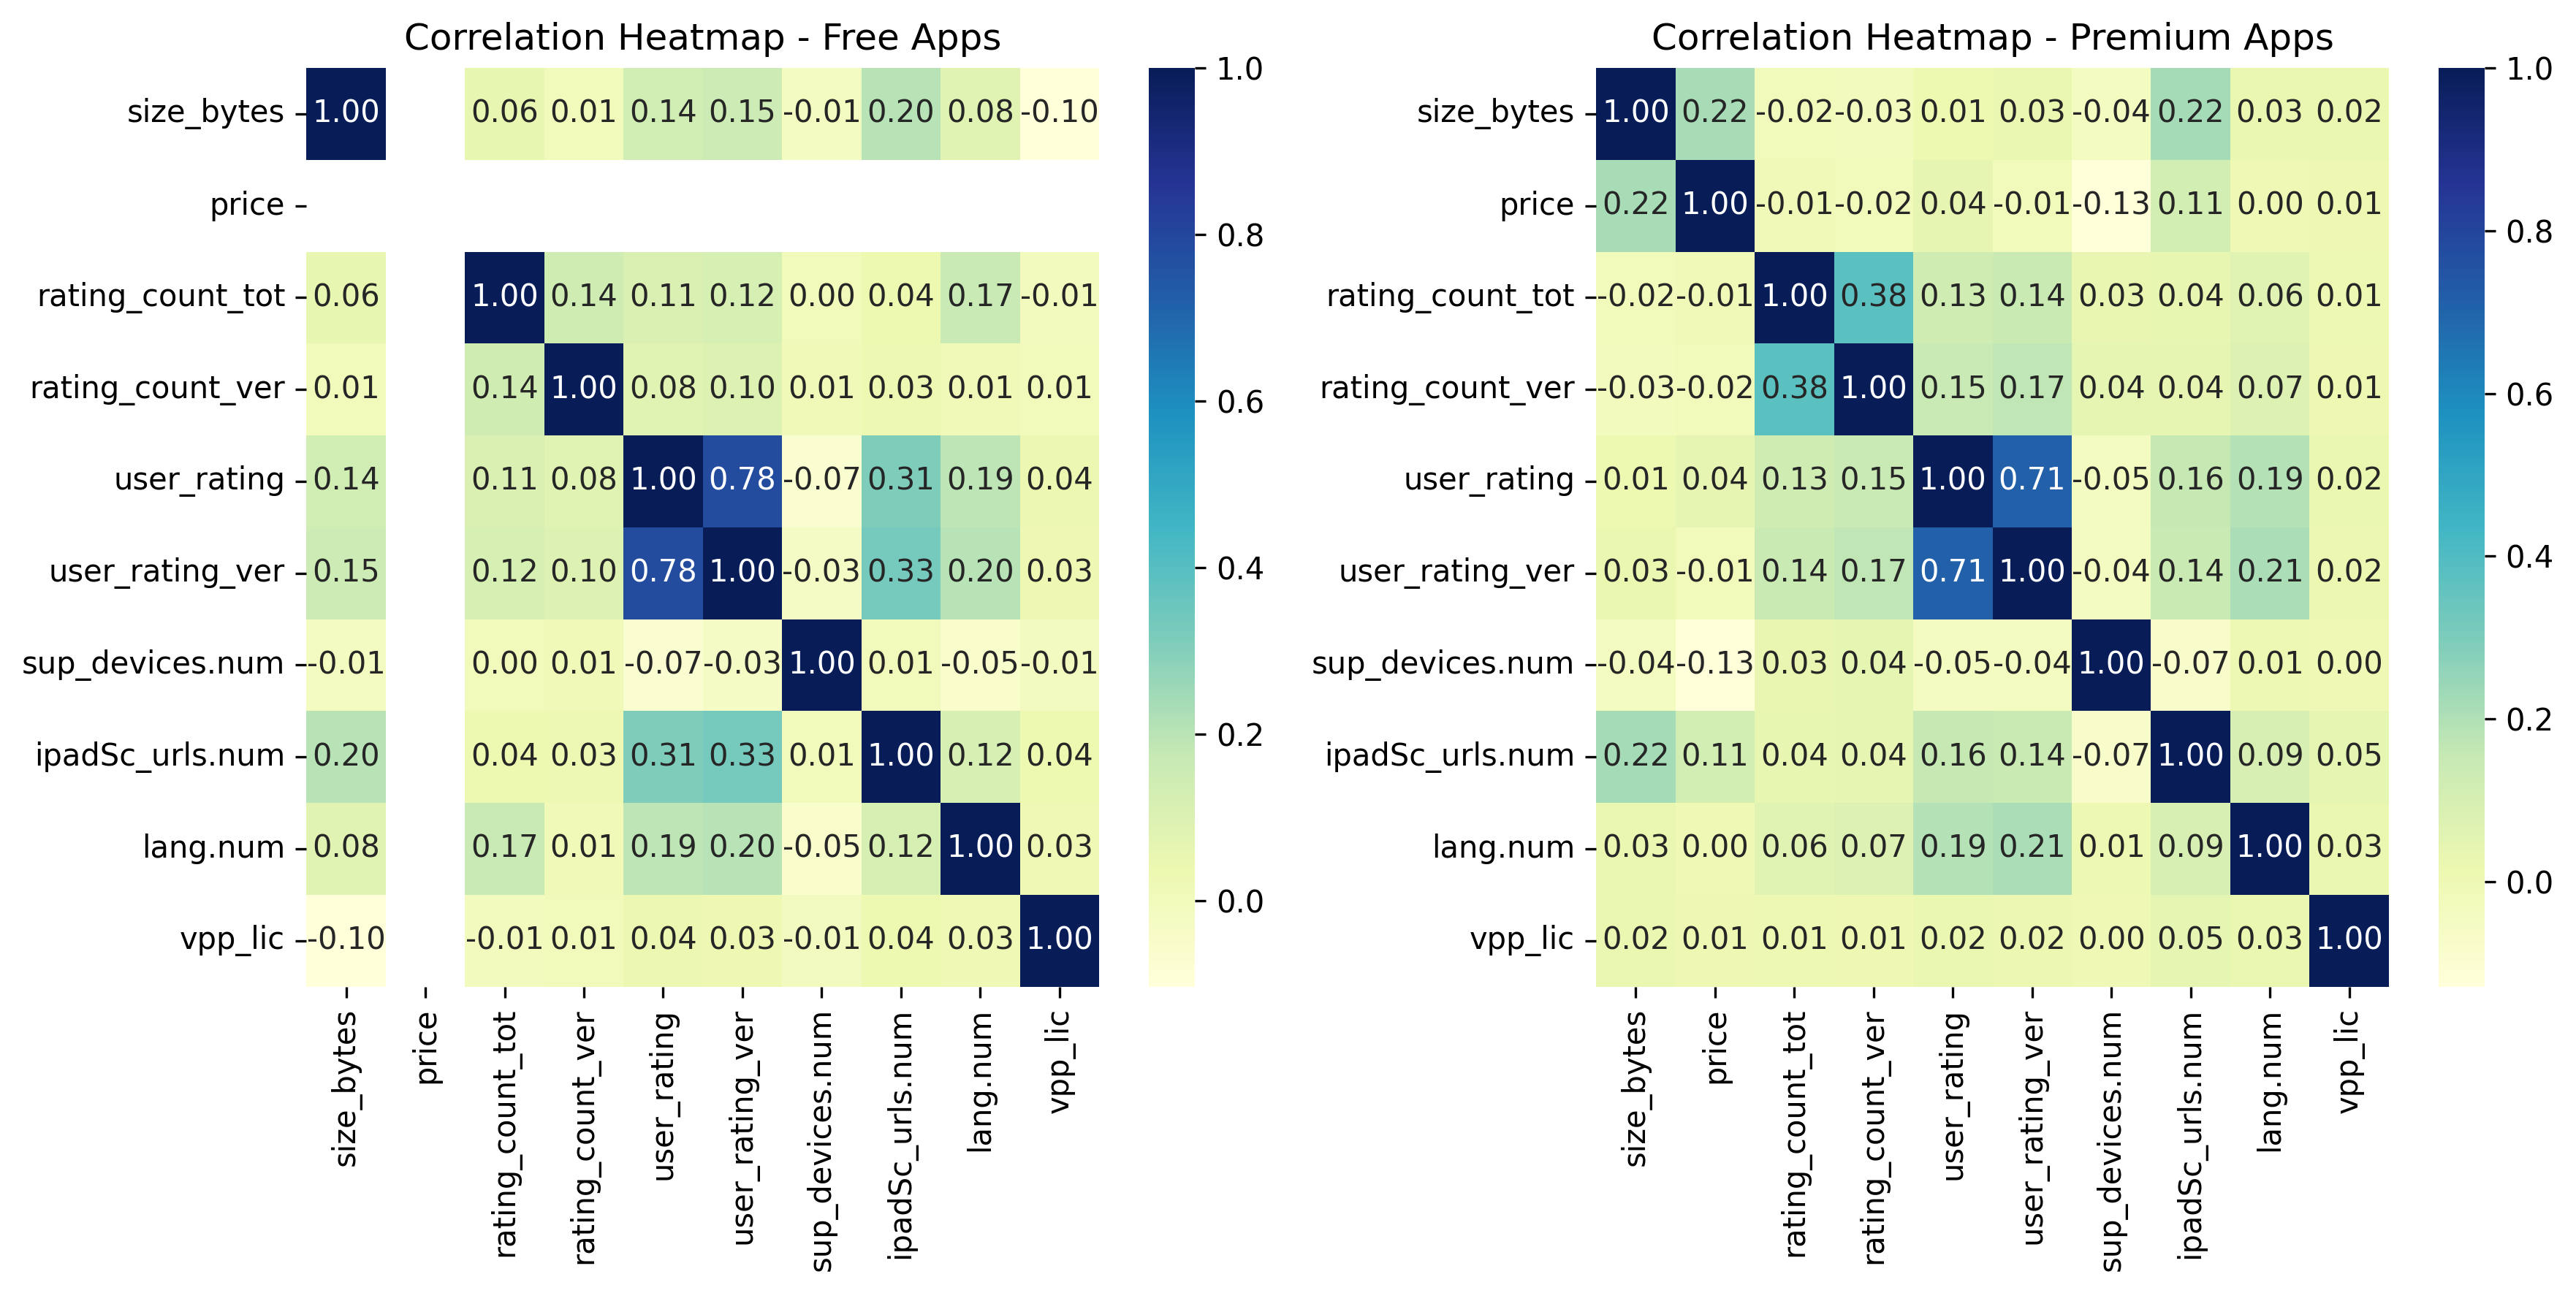

In [72]:
# create correlation matrix for free apps
corr_free = free_apps.corr()

# create correlation matrix for premium apps
corr_paid = premium_apps.corr()

# set figure size and DPI
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=300)

# create heatmap for free apps correlation
sns.heatmap(corr_free, ax=axes[0], annot=True, fmt='.2f', cmap="YlGnBu")

# set title for the first subplot
axes[0].set_title('Correlation Heatmap - Free Apps')

# create heatmap for premium apps correlation
sns.heatmap(corr_paid, ax=axes[1], annot=True, fmt='.2f', cmap="YlGnBu")

# set title for the second subplot
axes[1].set_title('Correlation Heatmap - Premium Apps')

# adjust the layout
plt.tight_layout()

# show the plot
plt.show()


* As expected, the Average User Rating value **'rating_count_ver'** (for current version) is highly correlated with Average User Rating value (for all version) **'user_rating'**.
* In the paid apps, there is a slightly positive correlation between **'price'** and **'rating_count_ver'** (ratings for the current version).
* In the paid apps, there is a slightly positive correlation between **language support** in the app and the **current version** of the app.
* In the free apps, there is a positive correlation between **user rating** and **screenshots per display**. 
* In the free apps, there is a slightly positive correlation between **language support** in the app and the **user ratings** of the app.

# **Natural Language Processing on the second dataset**

### **Objective**

Use Natural Language Processing (NLP) techniques to analyze the text and extract insights.

### **Questions**
* What insights can we gather from the descriptions of the apps? 
* How can description affect the popularity of a new launched app? 

### **Inspecting the dataset:**

In [73]:
apps_description.head()

id                                         track_name  size_bytes  \
0  281656475                                    PAC-MAN Premium   100788224   
1  281796108                          Evernote - stay organized   158578688   
2  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032   
3  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000   
4  282935706                                              Bible    92774400   

                                            app_desc  
0  SAVE 20%, now only $3.99 for a limited time!\n...  
1  Let Evernote change the way you organize your ...  
2  Download the most popular free weather app pow...  
3  The eBay app is the best way to find anything ...  
4  On more than 250 million devices around the wo...

Define a function to clean the text data by removing any punctuation, special characters, and stop words. In the same way, defining functions to perform the Sentiment Analysis.

In [74]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import string
from nltk.corpus import stopwords

In [75]:
# Create a function that clean the text data by removing any punctuation, special characters, and stop words:
def clean_text(text):
    """
    Utility function to clean text data
    """
    text = text.lower() # Convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')]) # Remove stop words
    return text

# Create a function to perform sentiment analysis on the cleaned text data using TextBlob:
def get_textblob_sentiment(text):
    """
    Utility function to perform sentiment analysis using TextBlob
    """
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Create a function to perform sentiment analysis on the cleaned text data using TextBlob:
def get_textblob_sentiment(text):
    """
    Utility function to perform sentiment analysis using TextBlob
    """
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

# Create a function to perform sentiment analysis on the cleaned text data using VADER:
def get_vader_sentiment(text):
    """
    Utility function to perform sentiment analysis using VADER
    """
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    sentiment_score = sentiment_scores['compound']
    return sentiment_score

Applying the functions on the app_desc column to obtain sentiment scores:

In [76]:
# Clean text data
apps_description['cleaned_desc'] = apps_description['app_desc'].apply(clean_text)

# Get sentiment scores using TextBlob
apps_description['textblob_sentiment'] = apps_description['cleaned_desc'].apply(get_textblob_sentiment)

# Get sentiment scores using VADER
apps_description['vader_sentiment'] = apps_description['cleaned_desc'].apply(get_vader_sentiment)

In [77]:
# Plot distribution of sentiment scores using TextBlob
color = 'rgba(0, 32, 63, 1)'

fig = px.histogram(apps_description, x='textblob_sentiment', nbins=20, color_discrete_sequence=[color])
fig.update_layout(title='Distribution of TextBlob Sentiment Scores', 
                  xaxis_title='Sentiment Score', 
                  yaxis_title='Frequency',
                  height=400, width=600)
fig.show()

In [78]:
# Plot distribution of sentiment scores using VADER
fig = px.histogram(apps_description, x='vader_sentiment', nbins=25, color_discrete_sequence=[color])
fig.update_layout(title='Distribution of VADER Sentiment Scores', 
                  xaxis_title='Sentiment Score', 
                  yaxis_title='Frequency',
                  height=400, width=600)
fig.show()

In [79]:
# Updating the df with the new columns
prime_genre = df.loc[:, 'prime_genre']
merged = pd.merge(apps_description, prime_genre, on='id')
merged

id                                         track_name  \
0      281656475                                    PAC-MAN Premium   
1      281796108                          Evernote - stay organized   
2      281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3      282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4      282935706                                              Bible   
...          ...                                                ...   
7192  1187617475                                              Kubik   
7193  1187682390                                  VR Roller-Coaster   
7194  1187779532              Bret Michaels Emojis + Lyric Keyboard   
7195  1187838770          VR Roller Coaster World - Virtual Reality   
7196  1188375727                       Escape the Sweet Shop Series   

      size_bytes                                           app_desc  \
0      100788224  SAVE 20%, now only $3.99 for a limited time!\n...   
1      158578688  Let Evernote change the way you organize your ...   
2      100524032  Download the most popular free weather app pow...   
3      128512000  The eBay app is the best way to find anything ...   
4       92774400  On more than 250 million devices around the wo...   
...          ...                                                ...   
7192   126644224  Place the falling blocks correctly in order to...   
7193   120760320  A thrilling virtual reality roller coaster exp...   
7194   111322112  Rock star Bret Michaels, winner of Celebrity A...   
7195    97235968  VR Roller Coaster World is an app for Google C...   
7196    90898432  5 previous escape games plus 1 new game in one...   

                                           cleaned_desc  textblob_sentiment  \
0     save 20 399 limited time one popular video gam...            0.078851   
1     let evernote change way organize personal prof...            0.120404   
2     download popular free weather app powered larg...            0.277323   
3     ebay app best way find anything need dresses h...            0.361982   
4     250 million devices around world people readin...            0.269444   
...                                                 ...                 ...   
7192  place falling blocks correctly order clear lay...            0.103175   
7193  thrilling virtual reality roller coaster exper...            0.300000   
7194  rock star bret michaels winner celebrity appre...            0.591667   
7195  vr roller coaster world app google cardboard c...            0.618750   
7196  5 previous escape games plus 1 new game one pa...            0.110230   

      vader_sentiment   prime_genre  
0              0.9771         Games  
1              0.9935  Productivity  
2              0.9847       Weather  
3              0.9989      Shopping  
4              0.9977     Reference  
...               ...           ...  
7192          -0.7162         Games  
7193           0.7269         Games  
7194           0.9836     Utilities  
7195           0.9766         Games  
7196           0.9900         Games  

[7197 rows x 8 columns]

In [80]:
# Print mean sentiment scores for each app category
mean_sentiment_scores = merged.groupby('prime_genre').mean()[['textblob_sentiment', 'vader_sentiment']]
mean_sentiment_scores

C:\Users\Edwar\AppData\Local\Temp\ipykernel_15144\1388711447.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



textblob_sentiment  vader_sentiment
prime_genre                                           
Book                         0.110424         0.468558
Business                     0.180396         0.849142
Catalogs                     0.169321         0.581680
Education                    0.192385         0.845912
Entertainment                0.184053         0.701344
Finance                      0.078446         0.394293
Food & Drink                 0.195638         0.633310
Games                        0.121677         0.656921
Health & Fitness             0.206272         0.799102
Lifestyle                    0.159371         0.613351
Medical                      0.154745         0.760704
Music                        0.231486         0.942358
Navigation                   0.146762         0.604433
News                         0.160591         0.516753
Photo & Video                0.256593         0.925852
Productivity                 0.213373         0.889918
Reference                    0.166265         0.696647
Shopping                     0.184590         0.637281
Social Networking            0.156835         0.627800
Sports                       0.174634         0.773219
Travel                       0.174813         0.554659
Utilities                    0.172184         0.691880
Weather                      0.185650         0.759639

In [81]:
# Plotting the mean sentiment scores for each app category
fig = go.Figure()
fig.add_trace(go.Bar(x=mean_sentiment_scores.index, y=mean_sentiment_scores['textblob_sentiment'], name='TextBlob'))
fig.add_trace(go.Bar(x=mean_sentiment_scores.index, y=mean_sentiment_scores['vader_sentiment'], name='VADER'))
fig.update_layout(barmode='group', title='Average Sentiment Scores by Genre', xaxis_title='Genre', yaxis_title='Sentiment Score')
fig.show()

In [82]:
# Plotting the distribution of sentiment scores for each app category
fig = go.Figure()
fig.add_trace(go.Box(y=mean_sentiment_scores['textblob_sentiment'], name='TextBlob'))
fig.add_trace(go.Box(y=mean_sentiment_scores['vader_sentiment'], name='VADER'))
fig.update_layout(title='Distribution of Sentiment Scores by Genre', yaxis_title='Sentiment Score')
fig.show()

### **Findings**

*Technical Findings*
* The sentiment scores for different app genres vary significantly. For instance, sentiment scores for apps in the Music genre are higher compared to those in the Finance genre.
* TextBlob and VADER models generate different sentiment scores for the same app description. There is a significant difference in the sentiment scores generated by both models in almost all the app genres.
* Sentiment scores generated by both models are relatively higher for apps in the Music, Photo & Video, Productivity, and Reference genres. In contrast, Finance and News genres have relatively lower sentiment scores.
* The TextBlob model generally generates higher sentiment scores than VADER for most of the app genres. However, VADER model outperforms TextBlob in the Finance and News genres.

*Valuable Insights*
* Sentiment scores for Medical and Music categories are relatively high, suggesting that customers tend to have positive sentiments towards apps in those categories. On the other hand, the sentiment scores for Finance and Games categories are relatively low, indicating that customers may have negative or mixed feelings towards apps in those categories.
* We should focus on categories with low sentiment scores need to improve customer satisfaction.
* Benchmarking against competitors: By testing our own apps to the competition.
* Identify strenghts and weaknesses of the app in terms of interface, features, or customer service. 

### **Wordcloud**

The resulting word cloud will display the most frequently occurring words in the app descriptions, with larger words representing more frequent occurrences. This can provide stakeholders with a quick and visually appealing overview of the most common themes in the app descriptions.

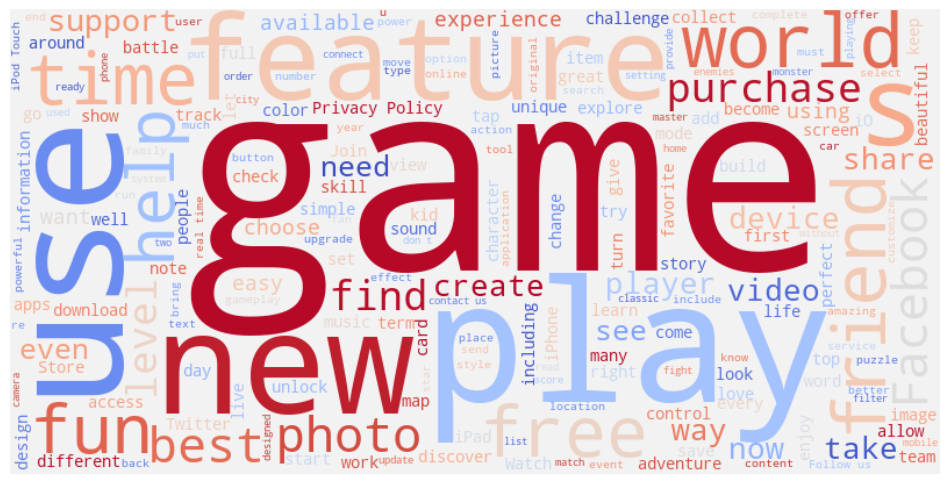

In [83]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add custom stopwords
custom_stopwords = set(['app', 'will', 'make', 'one'])
stopwords = STOPWORDS.union(custom_stopwords)

# Create a string of all app descriptions
text = " ".join(desc for desc in merged['app_desc'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='#f2f2f2', colormap='coolwarm', stopwords=stopwords).generate(text)

# Visualize the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show the word cloud
plt.show()

### **Findings**

* Games are the most popular category of apps, as evidenced by the high frequency of the word "game" in the app descriptions.
* Apps that emphasize play and user engagement may be particularly attractive to consumers, as the words "play" and "use" are frequently mentioned in app descriptions.
* The inclusion of free features, such as photo and video editing, may be a strong selling point for apps, as these words are frequently used in app descriptions.
* Apps that save users time may be particularly popular, as the word "time" is frequently mentioned in app descriptions, indicating a desire for efficiency and convenience.

# **United Kingdom User Reviews on the Top Rated Apps**

We previously have discovered that some of the apps with the highest proportion of positive ratings (all with 4.5 ★ on average). We have selected some of the most relevants per genre to perform the **users reviews analysis**: Instagram,  Clash of Clans and Spotify.

### **Data Extraction and Cleaning:**

In [84]:
# Import necessary libraries
from app_store_scraper import AppStore
import json

# Create dictionaries to store the reviews
instagram = AppStore(country='gb', app_name='instagram', app_id = '389801252')
instagram.review(how_many=200)

coc = AppStore(country='gb', app_name='clash of clans', app_id = '529479190')
coc.review(how_many=200)

spotify = AppStore(country='gb', app_name='spotify', app_id = '324684580')
spotify.review(how_many=200)

2023-04-03 07:35:47,432 [INFO] Base - Initialised: AppStore('gb', 'instagram', 389801252)
2023-04-03 07:35:47,434 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/gb/app/instagram/id389801252
2023-04-03 07:35:50,251 [INFO] Base - [id:389801252] Fetched 200 reviews (200 fetched in total)
2023-04-03 07:35:50,995 [INFO] Base - Initialised: AppStore('gb', 'clash-of-clans', 529479190)
2023-04-03 07:35:50,996 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/gb/app/clash-of-clans/id529479190
2023-04-03 07:35:53,023 [INFO] Base - [id:529479190] Fetched 200 reviews (200 fetched in total)
2023-04-03 07:35:54,435 [INFO] Base - Initialised: AppStore('gb', 'spotify', 324684580)
2023-04-03 07:35:54,437 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/gb/app/spotify/id324684580
2023-04-03 07:35:56,595 [INFO] Base - [id:324684580] Fetched 200 reviews (200 fetched in total)


In [85]:
# Creating the dataframes:
igdf = pd.DataFrame(np.array(instagram.reviews),columns=['review'])
igdf = igdf.join(pd.DataFrame(igdf.pop('review').tolist()))
igdf['app'] = 'Instagram'

cocdf = pd.DataFrame(np.array(coc.reviews),columns=['review'])
cocdf = cocdf.join(pd.DataFrame(cocdf.pop('review').tolist()))
cocdf['app'] = 'Clash of Clans'

spotifydf = pd.DataFrame(np.array(spotify.reviews),columns=['review'])
spotifydf = spotifydf.join(pd.DataFrame(spotifydf.pop('review').tolist()))
spotifydf['app'] = 'Spotify'
spotifydf.head()

date                                             review  \
0 2018-07-29 16:20:42  This was my favourite app of all time, until 2...   
1 2022-03-28 19:09:07  It’s a good app with good intentions but the a...   
2 2020-12-06 17:47:44  Ok so had this app for ages and tbh a very goo...   
3 2020-09-29 11:04:37  Yes I’ve given 5⭐️ really wishing there’s a ch...   
4 2020-04-29 12:56:22  I’m satisfied with most of what is on the app ...   

   rating  isEdited           userName  \
0       5     False               🔷Jim   
1       3     False           ggensbsh   
2       4     False   lillyiaeltonjhon   
3       5     False  Imkindnessandlove   
4       2     False        InvaderWolf   

                                               title      app  
0  What have they done, this was my favourite app...  Spotify  
1  Idk tbh it can be good but sometimes it’s anno...  Spotify  
2                                       Good but ...  Spotify  
3                                        For now ...  Spotify  
4                                    Too many issues  Spotify

In [86]:
merged_df = pd.concat([igdf, cocdf, spotifydf], ignore_index=True)
merged_df

date                                             review  \
0   2022-08-30 12:10:57  Someone scammed me over Instagram turned out t...   
1   2017-11-01 13:11:52  I have two accounts for a reason; one for pers...   
2   2023-01-12 17:21:45  So, I noticed that instagram’s community is te...   
3   2022-03-14 11:12:44  I always enjoyed using Instagram, for me it wa...   
4   2022-07-09 23:22:20  Yes, like others I don’t like the new layout, ...   
..                  ...                                                ...   
595 2018-02-15 19:02:18  While editing my playlists I like to move the ...   
596 2021-11-27 15:57:54  Whatever anyone says about “to many adds” or “...   
597 2021-10-06 15:44:32  It’s a good app to use to play music and stuff...   
598 2020-09-17 03:13:30  This is the only music app I use and I love ho...   
599 2020-10-05 01:05:44  I really do not like the issues with this app,...   

     rating  isEdited                                            title  \
0         5     False                              Hi everyone someone   
1         5     False                              New updates issues!   
2         1     False                                Terrible support.   
3         2     False         Not as good as used to be, becoming bias   
4         2     False             Removing sound control was a mistake   
..      ...       ...                                              ...   
595       4     False                                 Just One Problem   
596       5     False                                          Cool!!!   
597       5     False                                  Too much issues   
598       5     False           Greatest music app but maybe please...   
599       3     False  it’s good, I guess. But I have so many problems   

                 userName        app  
0             jay mk 2014  Instagram  
1             Emilie12345  Instagram  
2    Emily Roberts,age 13  Instagram  
3              Sauleee333  Instagram  
4               Aliann747  Instagram  
..                    ...        ...  
595       Social app rate    Spotify  
596           piggysistah    Spotify  
597            suki123123    Spotify  
598            Chloeyjoey    Spotify  
599         ShrubbyCanine    Spotify  

[600 rows x 7 columns]

Performing some data cleaning:

In [87]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Data Cleaning
print(merged_df.duplicated().sum())
print(merged_df.duplicated().isna().sum())

#Drop unnecessary columns
merged_df.drop('isEdited', axis=1, inplace=True)

# Clean the 'review' column: Standardize the text
merged_df['review'] = merged_df['review'].str.lower() # Convert to lowercase
merged_df['review'] = merged_df['review'].apply(lambda x: re.sub(r'\W+', ' ', x)) # Remove special characters and punctuation
merged_df['review'] = merged_df['review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])) # Remove stopwords

# Convert the 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Convert the 'rating' column to integer format
merged_df['rating'] = merged_df['rating'].astype(int)

# Save the cleaned data to a new CSV file
#merged_df.to_csv("cleaned_merged_df.csv", index=False)
merged_df

0
0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


date                                             review  \
0   2022-08-30 12:10:57  someone scammed instagram turned someone fake ...   
1   2017-11-01 13:11:52  two accounts reason one personal use one busin...   
2   2023-01-12 17:21:45  noticed instagram community terribly toxic pro...   
3   2022-03-14 11:12:44  always enjoyed using instagram good platform e...   
4   2022-07-09 23:22:20  yes like others like new layout agree forcing ...   
..                  ...                                                ...   
595 2018-02-15 19:02:18  editing playlists like move tracks around remo...   
596 2021-11-27 15:57:54  whatever anyone says many adds always trying m...   
597 2021-10-06 15:44:32  good app use play music stuff like new issue p...   
598 2020-09-17 03:13:30  music app use love send people gift cards try ...   
599 2020-10-05 01:05:44  really like issues app like add random songs p...   

     rating                                            title  \
0         5                              Hi everyone someone   
1         5                              New updates issues!   
2         1                                Terrible support.   
3         2         Not as good as used to be, becoming bias   
4         2             Removing sound control was a mistake   
..      ...                                              ...   
595       4                                 Just One Problem   
596       5                                          Cool!!!   
597       5                                  Too much issues   
598       5           Greatest music app but maybe please...   
599       3  it’s good, I guess. But I have so many problems   

                 userName        app  
0             jay mk 2014  Instagram  
1             Emilie12345  Instagram  
2    Emily Roberts,age 13  Instagram  
3              Sauleee333  Instagram  
4               Aliann747  Instagram  
..                    ...        ...  
595       Social app rate    Spotify  
596           piggysistah    Spotify  
597            suki123123    Spotify  
598            Chloeyjoey    Spotify  
599         ShrubbyCanine    Spotify  

[600 rows x 6 columns]

In [88]:
# Tokenize the reviews
merged_df['tokens'] = merged_df['review'].apply(nltk.word_tokenize)
merged_df

date                                             review  \
0   2022-08-30 12:10:57  someone scammed instagram turned someone fake ...   
1   2017-11-01 13:11:52  two accounts reason one personal use one busin...   
2   2023-01-12 17:21:45  noticed instagram community terribly toxic pro...   
3   2022-03-14 11:12:44  always enjoyed using instagram good platform e...   
4   2022-07-09 23:22:20  yes like others like new layout agree forcing ...   
..                  ...                                                ...   
595 2018-02-15 19:02:18  editing playlists like move tracks around remo...   
596 2021-11-27 15:57:54  whatever anyone says many adds always trying m...   
597 2021-10-06 15:44:32  good app use play music stuff like new issue p...   
598 2020-09-17 03:13:30  music app use love send people gift cards try ...   
599 2020-10-05 01:05:44  really like issues app like add random songs p...   

     rating                                            title  \
0         5                              Hi everyone someone   
1         5                              New updates issues!   
2         1                                Terrible support.   
3         2         Not as good as used to be, becoming bias   
4         2             Removing sound control was a mistake   
..      ...                                              ...   
595       4                                 Just One Problem   
596       5                                          Cool!!!   
597       5                                  Too much issues   
598       5           Greatest music app but maybe please...   
599       3  it’s good, I guess. But I have so many problems   

                 userName        app  \
0             jay mk 2014  Instagram   
1             Emilie12345  Instagram   
2    Emily Roberts,age 13  Instagram   
3              Sauleee333  Instagram   
4               Aliann747  Instagram   
..                    ...        ...   
595       Social app rate    Spotify   
596           piggysistah    Spotify   
597            suki123123    Spotify   
598            Chloeyjoey    Spotify   
599         ShrubbyCanine    Spotify   

                                                tokens  
0    [someone, scammed, instagram, turned, someone,...  
1    [two, accounts, reason, one, personal, use, on...  
2    [noticed, instagram, community, terribly, toxi...  
3    [always, enjoyed, using, instagram, good, plat...  
4    [yes, like, others, like, new, layout, agree, ...  
..                                                 ...  
595  [editing, playlists, like, move, tracks, aroun...  
596  [whatever, anyone, says, many, adds, always, t...  
597  [good, app, use, play, music, stuff, like, new...  
598  [music, app, use, love, send, people, gift, ca...  
599  [really, like, issues, app, like, add, random,...  

[600 rows x 7 columns]

Lemmatize or stem the text data: Lemmatization refers to converting words to their base form, while stemming refers to reducing words to their root form. This step can help to reduce the dimensionality of the text data and make it easier to work with.


In [89]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
merged_df['lemmatized_text'] = merged_df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
merged_df

date                                             review  \
0   2022-08-30 12:10:57  someone scammed instagram turned someone fake ...   
1   2017-11-01 13:11:52  two accounts reason one personal use one busin...   
2   2023-01-12 17:21:45  noticed instagram community terribly toxic pro...   
3   2022-03-14 11:12:44  always enjoyed using instagram good platform e...   
4   2022-07-09 23:22:20  yes like others like new layout agree forcing ...   
..                  ...                                                ...   
595 2018-02-15 19:02:18  editing playlists like move tracks around remo...   
596 2021-11-27 15:57:54  whatever anyone says many adds always trying m...   
597 2021-10-06 15:44:32  good app use play music stuff like new issue p...   
598 2020-09-17 03:13:30  music app use love send people gift cards try ...   
599 2020-10-05 01:05:44  really like issues app like add random songs p...   

     rating                                            title  \
0         5                              Hi everyone someone   
1         5                              New updates issues!   
2         1                                Terrible support.   
3         2         Not as good as used to be, becoming bias   
4         2             Removing sound control was a mistake   
..      ...                                              ...   
595       4                                 Just One Problem   
596       5                                          Cool!!!   
597       5                                  Too much issues   
598       5           Greatest music app but maybe please...   
599       3  it’s good, I guess. But I have so many problems   

                 userName        app  \
0             jay mk 2014  Instagram   
1             Emilie12345  Instagram   
2    Emily Roberts,age 13  Instagram   
3              Sauleee333  Instagram   
4               Aliann747  Instagram   
..                    ...        ...   
595       Social app rate    Spotify   
596           piggysistah    Spotify   
597            suki123123    Spotify   
598            Chloeyjoey    Spotify   
599         ShrubbyCanine    Spotify   

                                                tokens  \
0    [someone, scammed, instagram, turned, someone,...   
1    [two, accounts, reason, one, personal, use, on...   
2    [noticed, instagram, community, terribly, toxi...   
3    [always, enjoyed, using, instagram, good, plat...   
4    [yes, like, others, like, new, layout, agree, ...   
..                                                 ...   
595  [editing, playlists, like, move, tracks, aroun...   
596  [whatever, anyone, says, many, adds, always, t...   
597  [good, app, use, play, music, stuff, like, new...   
598  [music, app, use, love, send, people, gift, ca...   
599  [really, like, issues, app, like, add, random,...   

                                       lemmatized_text  
0    [someone, scammed, instagram, turned, someone,...  
1    [two, account, reason, one, personal, use, one...  
2    [noticed, instagram, community, terribly, toxi...  
3    [always, enjoyed, using, instagram, good, plat...  
4    [yes, like, others, like, new, layout, agree, ...  
..                                                 ...  
595  [editing, playlist, like, move, track, around,...  
596  [whatever, anyone, say, many, add, always, try...  
597  [good, app, use, play, music, stuff, like, new...  
598  [music, app, use, love, send, people, gift, ca...  
599  [really, like, issue, app, like, add, random, ...  

[600 rows x 8 columns]

## **Brief Exploration Data Analysis**

### **1. What is the average rating for each app in the UK?**

In [90]:
# Calculate the average rating by app
app_ratings = merged_df.groupby('app')[['rating']].mean().reset_index().sort_values(by='rating', ascending=False)
print(app_ratings)
fig = px.bar(app_ratings, x='app', y='rating', title='Average ratings by app in the UK', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

              app  rating
0  Clash of Clans   4.025
2         Spotify   3.765
1       Instagram   2.795


**Findings:**
* Clash of Clans has the highest average rating among UK users, indicating it is likely a popular and well-liked app in this market.
* Spotify also has a high average rating, suggesting that it may be a popular app for music streaming among UK users.
* Instagram has the lowest average rating among the three apps, indicating that it may have some room for improvement in terms of user satisfaction in the UK market.However, further analysis would be needed to determine the specific factors driving this lower rating.

### **2. What are the most used words in app reviews in the UK?**

In [91]:
from collections import Counter

# Create an encoded dataframe
merged_df_encoded = pd.get_dummies(merged_df, columns=['app'])
# get a list of unique app names
apps = merged_df_encoded.columns[6:]

# create a list of traces for each app
traces = []
for app in apps:
    app_df = merged_df_encoded[merged_df_encoded[app] == 1]
    app_text_list = [word for sublist in app_df['lemmatized_text'] for word in sublist]
    app_word_counts = Counter(app_text_list)
    app_top_words = app_word_counts.most_common(10)
    if app_top_words:
        words, counts = zip(*app_top_words)
        trace = go.Bar(x=list(words), y=list(counts), name=app)
        traces.append(trace)

# create the layout and figure
layout = go.Layout(title='Recurrence of common words in the review for each app',
                   xaxis={'title': 'Words'},
                   yaxis={'title': 'Count'})
fig = go.Figure(data=traces, layout=layout)

# show the figure
fig.show()

### **Takeaways**


* Clash of Clans: The most common words used in relation to Clash of Clans are "game", "clan", "base", and "upgrade". This suggests that players are focused on improving their gameplay by upgrading their base and collaborating with their clan. It may be useful for the game developers to continue to invest in features that encourage clan collaboration and upgrading.

* Instagram: The most common words used in relation to Instagram are "account", "post", "like", and "people". This suggests that users are primarily using the app to engage with other users' content and grow their own following. It may be useful for businesses and influencers to focus on creating engaging content that will encourage more likes and follows.

* Spotify: The most common words used in relation to Spotify are "song", "playlist", and "music". This suggests that users are focused on discovering and listening to music on the app. It may be useful for Spotify to continue to invest in features that help users discover new music and create custom playlists.

### **3. How have user reviews and ratings changed over time for popular apps in the UK? If so, which trend could be identified?**

In [92]:
# group merged_df by app and date
grouped_df = merged_df.groupby(['app', pd.Grouper(key='date', freq='5M')]).agg({'rating': 'mean', 'review': 'count'})

# create traces for each app
traces = []
for app in merged_df['app'].unique():
    app_df = grouped_df.loc[app]
    trace = go.Scatter(x=app_df.index, y=app_df['rating'], mode='lines', name=app)
    traces.append(trace)

# create layout and figure
layout = go.Layout(title='Average rating of apps over time (UK reviews)', xaxis={'title': 'Date'}, yaxis={'title': 'Rating'})
fig = go.Figure(data=traces, layout=layout)

# show the figure
fig.show()

## **Findings**

* Clash of Clans: The app has maintained a high average rating over time, with a peak in Q2 2019. However, the rating dropped significantly in Q1 2022.
* Instagram: The app has had fluctuating ratings over time, the overall rating shows a massive drop until the end of 2022. However, the situation seems to have been reversed in Q1 2023, since it shows a recovery that surpassed the other apps.
* Spotify: The app has maintained a relatively consistent rating over time, with a peak in Q4 2021. However, after this peak there is a drop with the lowest levels of satisfaction during the sample period.

## **Sentiment Analysis of the Top Rated Apps in the UK**

In [93]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Define a function to get the sentiment of a review
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity
# Apply the function to the 'lemmatized_text' column
merged_df['sentiment'] = merged_df['lemmatized_text'].apply(lambda x: get_sentiment(' '.join(x)))

# Define a function to get the sentiment of a review using VADER
vader = SentimentIntensityAnalyzer()
# perform sentiment analysis using Vader on the lemmatized text
merged_df['vader_scores'] = merged_df['lemmatized_text'].apply(lambda x: vader.polarity_scores(' '.join(x)))
# extract the compound score and label sentiment as positive, negative or neutral
merged_df['vader_compound'] = merged_df['vader_scores'].apply(lambda x: x['compound'])
merged_df['vader_sentiment'] = merged_df['vader_compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
merged_df.tail(3)

date                                             review  \
597 2021-10-06 15:44:32  good app use play music stuff like new issue p...   
598 2020-09-17 03:13:30  music app use love send people gift cards try ...   
599 2020-10-05 01:05:44  really like issues app like add random songs p...   

     rating                                            title       userName  \
597       5                                  Too much issues     suki123123   
598       5           Greatest music app but maybe please...     Chloeyjoey   
599       3  it’s good, I guess. But I have so many problems  ShrubbyCanine   

         app                                             tokens  \
597  Spotify  [good, app, use, play, music, stuff, like, new...   
598  Spotify  [music, app, use, love, send, people, gift, ca...   
599  Spotify  [really, like, issues, app, like, add, random,...   

                                       lemmatized_text  sentiment  \
597  [good, app, use, play, music, stuff, like, new...   0.070346   
598  [music, app, use, love, send, people, gift, ca...   0.531250   
599  [really, like, issue, app, like, add, random, ...  -0.030952   

                                          vader_scores  vader_compound  \
597  {'neg': 0.176, 'neu': 0.456, 'pos': 0.368, 'co...          0.8481   
598  {'neg': 0.062, 'neu': 0.529, 'pos': 0.409, 'co...          0.9790   
599  {'neg': 0.109, 'neu': 0.694, 'pos': 0.197, 'co...          0.5851   

    vader_sentiment  
597        positive  
598        positive  
599        positive

In [94]:
merged_df.groupby("app")["vader_compound"].describe()

count      mean       std     min       25%      50%      75%  \
app                                                                             
Clash of Clans  200.0  0.636861  0.592847 -0.9879  0.700150  0.92915  0.97165   
Instagram       200.0  0.433513  0.691185 -0.9931 -0.083725  0.84740  0.95930   
Spotify         200.0  0.591147  0.567514 -0.9825  0.506425  0.87315  0.96010   

                   max  
app                     
Clash of Clans  0.9975  
Instagram       0.9964  
Spotify         0.9944

In [95]:
fig = px.box(merged_df, x="app", y="vader_compound", points="all", title="VADER Compound Scores per App (UK Reviews)", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

### **Findings:**


* Clash of Clans: The app has a high average VADER score, indicating positive sentiment among users. The stakeholders can focus on leveraging this positive sentiment to attract new users and retain existing ones.

* Instagram: While the app has a positive average VADER score, the high standard deviation suggests that there is a wide range of sentiment among users. The stakeholders can analyze the reasons behind the negative sentiment and try to address them to improve the overall user experience.

* Spotify: The app has a high average VADER score, indicating positive sentiment among users. The stakeholders can leverage this positive sentiment to attract new users and retain existing ones, and also explore opportunities to further enhance the user experience.




### **Distribution of Sentiment Scores for Reviews in the popular UK Apps**

In [141]:
# Define sentiment ranges
pos_range = (0.333, 1)
neu_range = (-0.333, 0.333)
neg_range = (-1, -0.333)

# Classify vader scores into positive, neutral, or negative
pos_scores = merged_df[merged_df['vader_compound'].between(pos_range[0], pos_range[1])]['vader_compound']
neu_scores = merged_df[merged_df['vader_compound'].between(neu_range[0], neu_range[1])]['vader_compound']
neg_scores = merged_df[merged_df['vader_compound'].between(neg_range[0], neg_range[1])]['vader_compound']

# Count number of reviews in each category
pos_count = len(pos_scores)
neu_count = len(neu_scores)
neg_count = len(neg_scores)

# Create a bar chart using Plotly Express
fig = px.bar(x=['Positive', 'Neutral', 'Negative'],
             y=[pos_count, neu_count, neg_count],
             color=['Positive', 'Neutral', 'Negative'],
             color_discrete_map={'Positive': '#00563F', 'Neutral': '#FFD23F', 'Negative': '#800020'},
             labels={'x': 'Sentiment', 'y': 'Number of Reviews'},
             title='Distribution of Sentiment Scores for Reviews in the popular UK Apps')

# Show plot
fig.show()


### **Findings:**

* Positive reviews are the most common, with 459 out of 600 total reviews falling into this category. This indicates that users generally have a positive sentiment towards the popular UK apps.
* Neutral reviews are the least common, with only 49 out of 600 reviews being classified as neutral. This suggests that users either have strong positive or negative opinions about the apps, with very few feeling indifferent.
* Negative reviews make up a significant proportion of the total reviews, with 92 out of 600 reviews falling into this category. While the majority of reviews are positive, it's important for stakeholders to address the concerns of users who have negative experiences with the apps in order to improve overall user satisfaction and retention.

## **Recurrence of most used words among reviews**

 The dataset can be used to classify reviews into different categories such as positive, negative, or neutral. This can be done using machine learning algorithms such as Support Vector Machines (SVMs) or Naive Bayes classifiers.

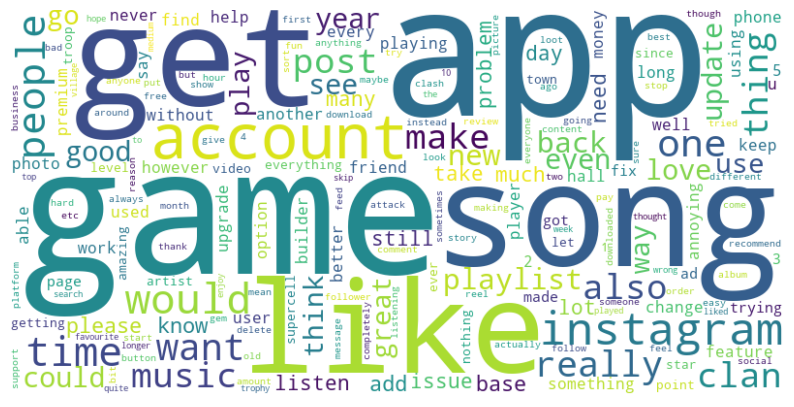

In [147]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the text from the title and lemmatized_text columns
text = " ".join(merged_df['title'].astype(str).tolist() + merged_df['lemmatized_text'].astype(str).tolist())

# Count the frequency of each word
word_counts = Counter(text.split())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Findings:**

* App and game are the most frequently used words in the reviews. This suggests that users of these popular UK apps are primarily interested in the functionality and entertainment value of the app.

* The words "like" and "would" are also frequently used in the reviews. This indicates that users have a positive attitude towards the app and are likely to recommend it to others.

* The presence of the word "account" and "Instagram" suggests that social media integration is an important feature for users of these apps. This information can be used by developers to improve social media integration and create a more engaging user experience.
* The most common words used in the reviews are related to the app/game itself, indicating that users are mainly discussing the functionality and features of the app/game in their reviews.

* The presence of words like "account" and "Instagram" suggest that many of the reviews are related to apps that require users to create an account or integrate with social media platforms. This may indicate a trend towards social media integration in app development.